# Genome Data Analysis

**Data file:** 1000 Genomes 30x on GRCh38

*The data file appears to contain information related to the 1000 Genomes Project. Specifically, the dataset with 30x coverage on the GRCh38 reference genome.*

**Source of data:** IGSR: The International Genome Sample Resource.

**Columns:**
1. **Sample name:** This likely represents the unique identifier or name assigned to each sample in the dataset.

2. **Sex:** Indicates the biological sex of the individual, with possible values like 'male' or 'female'.

3. **Biosample ID:** A unique identifier assigned to each biosample, which is a sample of biological material.

4. **Population code:** Represents a code assigned to indicate the population from which the individual originates.

5. **Population name:** Describes the name of the population to which the individual belongs.

6. **Superpopulation code:** Represents a code assigned to indicate the superpopulation to which the individual belongs. Superpopulations are broader groups that may include multiple populations.

7. **Superpopulation name:** Describes the name of the superpopulation to which the individual belongs.

8. **Population elastic ID:** This might be an identifier that is used in a specific context or by a particular system.

9. **Data collections:** Indicates the collections of data to which the sample belongs. This could include details about the specific dataset or project.



The data downloded was in .tsv format, So we will be converting the file  .tsv to .csv format for easy handling and analysis. 

In [1]:
import csv

def tsv_to_csv(input_tsv, output_csv):
    with open(input_tsv, 'r', newline='') as tsvfile:
        with open(output_csv, 'w', newline='') as csvfile:
            tsv_reader = csv.reader(tsvfile, delimiter='\t')
            csv_writer = csv.writer(csvfile)

            for row in tsv_reader:
                csv_writer.writerow(row)

# mentioning the file names of the data to be converted. (Make sure you create a blank csv file before starting the conversion) the tsv data will be written on the csv file created)
tsv_to_csv("C:\\Users\\irosh\Downloads\\igsr-1000 genomes 30x on grch38.tsv.tsv", "C:\\Users\\irosh\\OneDrive\\Documents\\test.csv")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a pandas DataFrame
df = pd.read_csv("C:\\Users\\irosh\\OneDrive\\Documents\\test.csv")  # load the csv file with the converted data

# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

# Summary statistics for categorical columns
print("\nCategorical Column Summary:")
print(df.describe(include=['object']))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())




Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sample name            3202 non-null   object
 1   Sex                    3202 non-null   object
 2   Biosample ID           3202 non-null   object
 3   Population code        3202 non-null   object
 4   Population name        3202 non-null   object
 5   Superpopulation code   3202 non-null   object
 6   Superpopulation name   3202 non-null   object
 7   Population elastic ID  3202 non-null   object
 8   Data collections       3202 non-null   object
dtypes: object(9)
memory usage: 225.3+ KB
None

Categorical Column Summary:
       Sample name     Sex Biosample ID Population code Population name  \
count         3202    3202         3202            3202            3202   
unique        3202       2         3202              27              38   
top        HG

<p>As per the generated output, the data consists of 3202 rows, we can see the data type of all the columns are objects. There are no missing values in the data set. </p>

## Categorical Column Summary

The summary provides insights into key categorical columns:

### Sample name
- **Count:** 3202 samples
- **Unique:** 3202 unique sample names
- **Top:** HG00271
- **Frequency:** Each sample name appears once

### Sex
- **Count:** 3202 samples
- **Unique:** 2 unique values (male, female)
- **Top:** female
- **Frequency:** Female samples (1603) slightly outnumber male samples

### Biosample ID
- **Count:** 3202 samples
- **Unique:** 3202 unique biosample IDs
- **Top:** SAME123417
- **Frequency:** Each biosample ID appears once

### Population code
- **Count:** 3202 samples
- **Unique:** 27 unique population codes
- **Top:** CEU
- **Frequency:** The population code 'CEU' (Utah Residents with Northern and Western European Ancestry) appears most frequently (179 times)

### Population name
- **Count:** 3202 samples
- **Unique:** 38 unique population names
- **Top:** CEPH
- **Frequency:** The population name 'CEPH' appears most frequently (179 times)

### Superpopulation code
- **Count:** 3202 samples
- **Unique:** 6 unique superpopulation codes
- **Top:** AFR
- **Frequency:** The superpopulation code 'AFR' (African) appears most frequently (893 times)

### Superpopulation name
- **Count:** 3202 samples
- **Unique:** 10 unique superpopulation names
- **Top:** African Ancestry
- **Frequency:** The superpopulation 'African Ancestry' appears most frequently (886 times)

### Population elastic ID
- **Count:** 3202 samples
- **Unique:** 38 unique population elastic IDs
- **Top:** CEU
- **Frequency:** The population elastic ID 'CEU' appears most frequently (179 times)

### Data collections
- **Count:** 3202 samples
- **Unique:** 37 unique data collection values
- **Top:** 1000 Genomes on GRCh38,1000 Genomes 30x on GRCh38,1000 Genomes phase 3 release
- **Frequency:** This data collection combination appears most frequently (1251 times)

## Conclusion

This initial categorical column summary provides a comprehensive overview of the dataset, highlighting key characteristics of each categorical variable. Further analyses and visualizations can be conducted to gain deeper insights into relationships and patterns within the data.

# Exploratory Data Analysis 

In this we are going to perform in dept analysis on the data set. Exploring each column and the relationship between each column. 

In [3]:
# Unique values and their counts
sample_name_counts = df['Sample name'].value_counts()
print("Sample name counts:\n", sample_name_counts)

Sample name counts:
 Sample name
HG00271    1
HG01699    1
HG03134    1
HG03303    1
HG01682    1
          ..
NA18870    1
NA19437    1
NA18875    1
NA18907    1
NA12236    1
Name: count, Length: 3202, dtype: int64


In [4]:
# Unique values and their counts
biosample_id_counts = df['Biosample ID'].value_counts()
print("Biosample ID counts:\n", biosample_id_counts)


Biosample ID counts:
 Biosample ID
SAME123417      1
SAME1839210     1
SAME1839380     1
SAME1839485     1
SAME124654      1
               ..
SAME125101      1
SAME123851      1
SAME123545      1
SAME123563      1
SAMEA6604124    1
Name: count, Length: 3202, dtype: int64


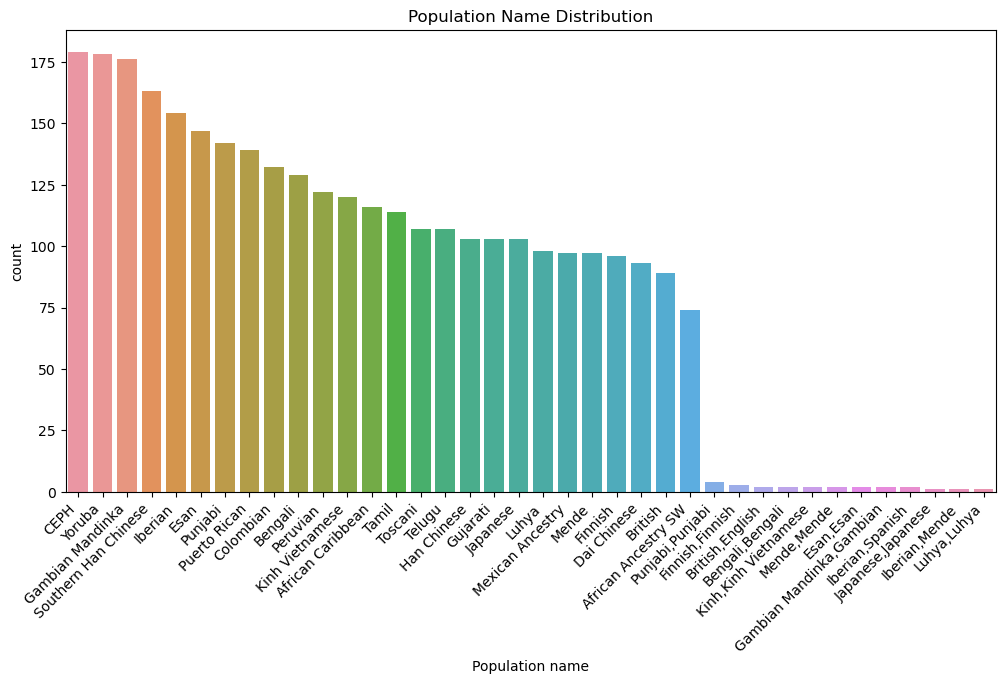

In [5]:
# Distribution of Population name
plt.figure(figsize=(12, 6))
sns.countplot(x='Population name', data=df, order=df['Population name'].value_counts().index)
plt.title('Population Name Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

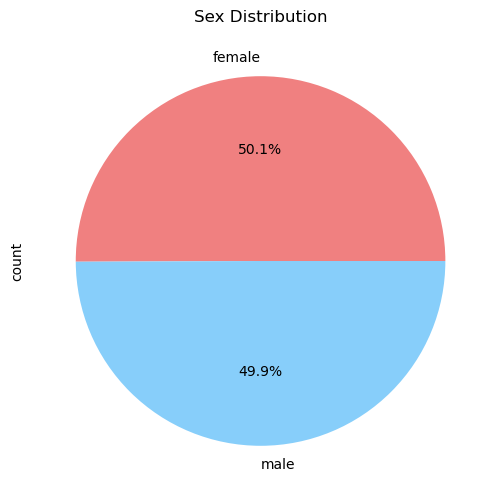

In [6]:


# Sex distribution visualization
plt.figure(figsize=(6, 6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Sex Distribution')
plt.show()

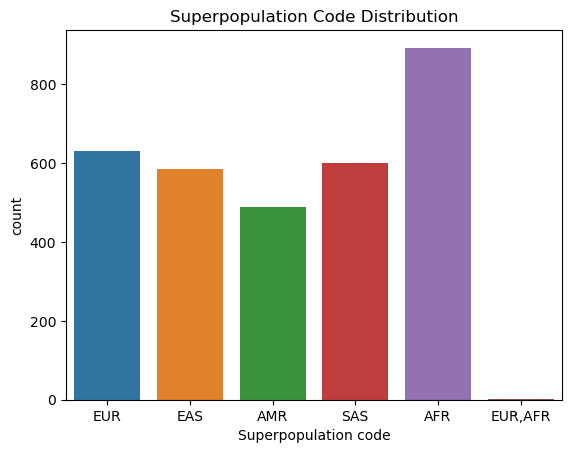

In [7]:
# Distribution of Superpopulation code
sns.countplot(x='Superpopulation code', data=df)
plt.title('Superpopulation Code Distribution')
plt.show()

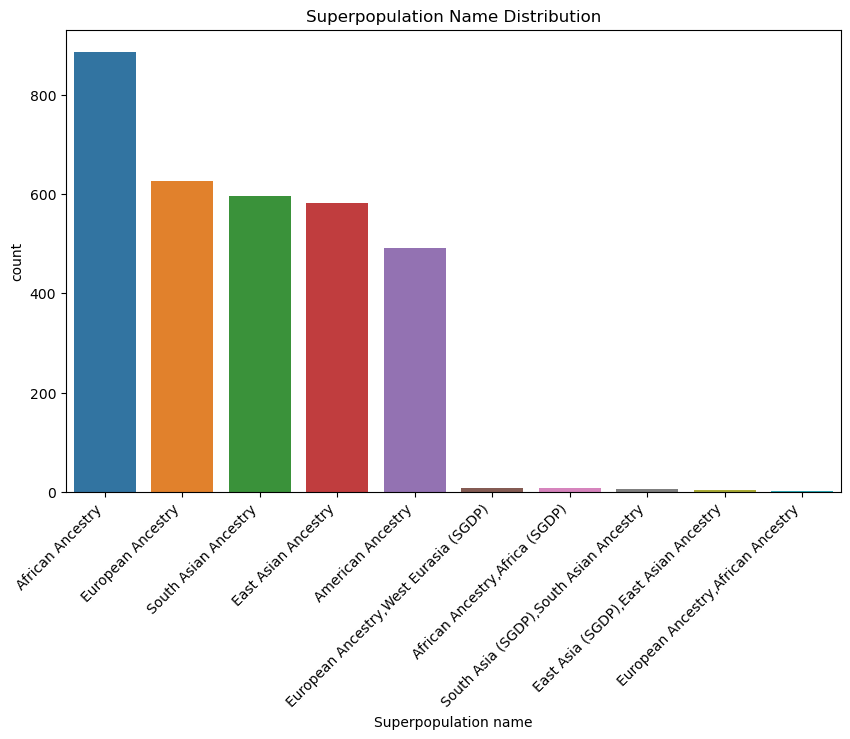

In [8]:
# Distribution of Superpopulation name
plt.figure(figsize=(10, 6))
sns.countplot(x='Superpopulation name', data=df, order=df['Superpopulation name'].value_counts().index)
plt.title('Superpopulation Name Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

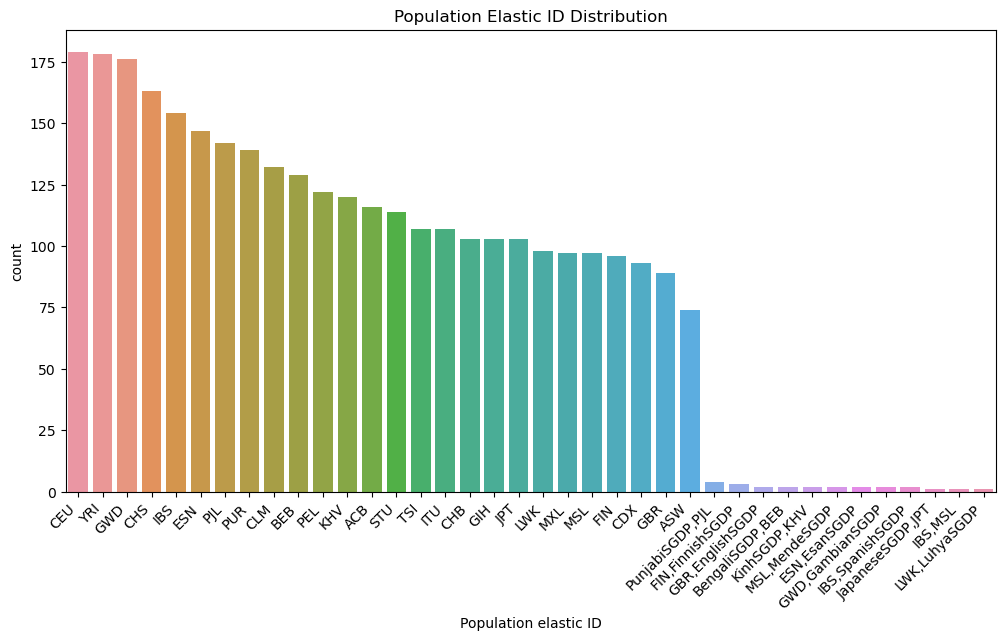

In [9]:
# Distribution of Population elastic ID
plt.figure(figsize=(12, 6))
sns.countplot(x='Population elastic ID', data=df, order=df['Population elastic ID'].value_counts().index)
plt.title('Population Elastic ID Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

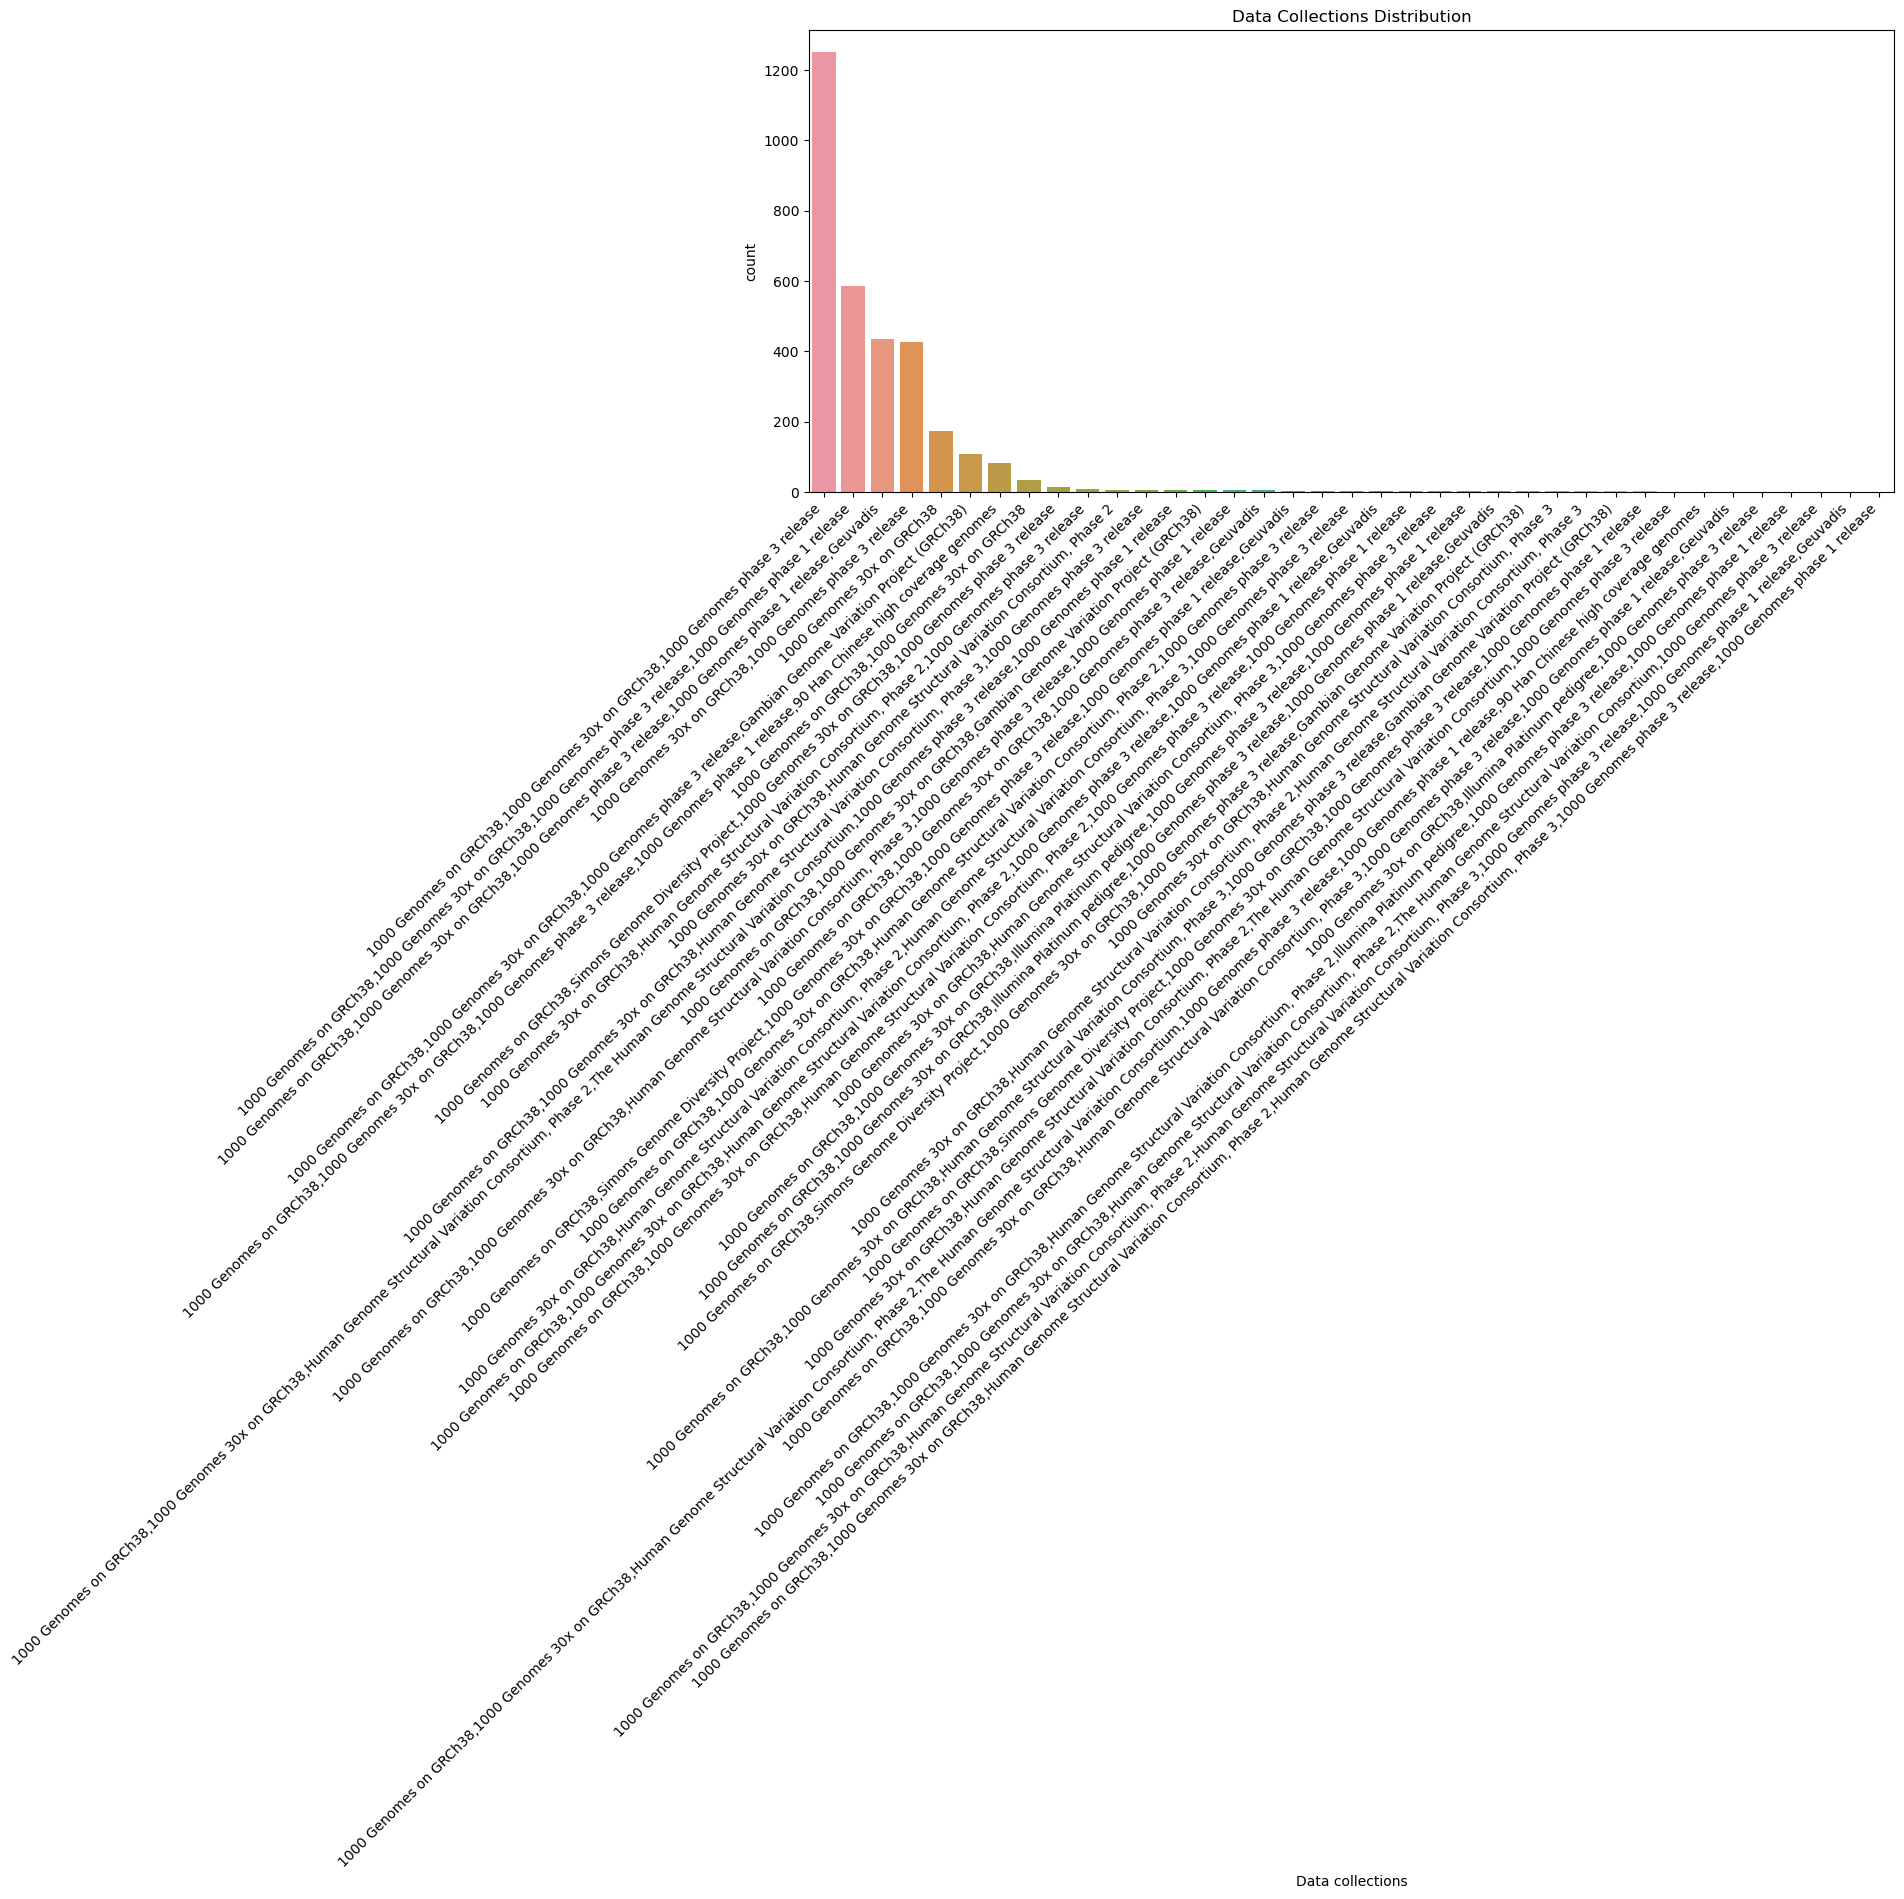

In [10]:
# Distribution of Data collections
plt.figure(figsize=(14, 6))
sns.countplot(x='Data collections', data=df, order=df['Data collections'].value_counts().index)
plt.title('Data Collections Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

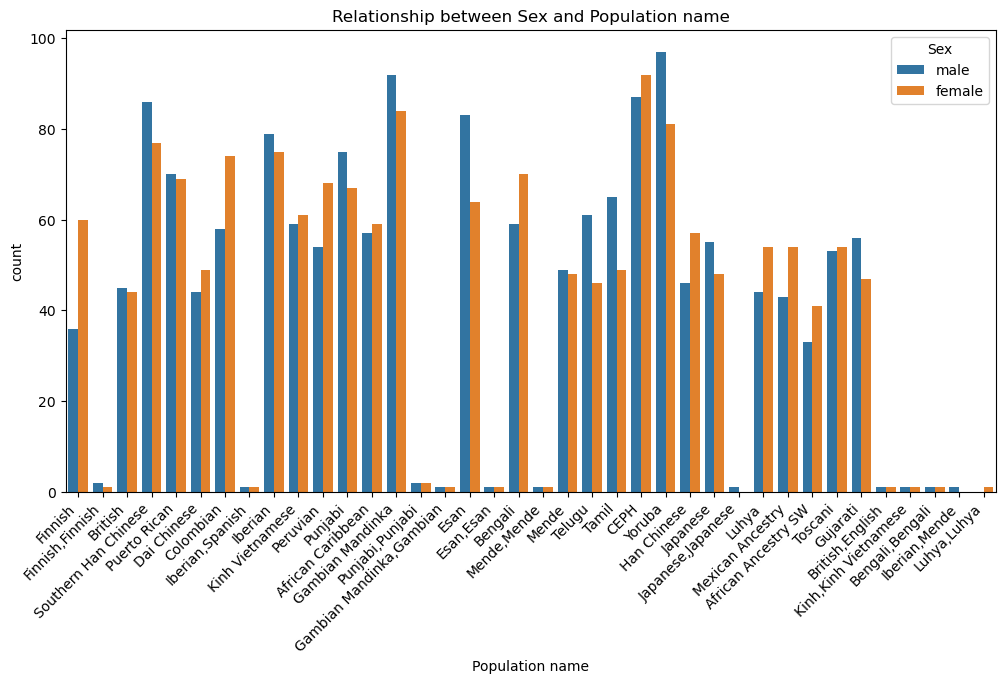

In [11]:
# Exploring relationships among the columns

# Relationship between Sex and Population name
plt.figure(figsize=(12, 6))
sns.countplot(x='Population name', hue='Sex', data=df)
plt.title('Relationship between Sex and Population name')
plt.xticks(rotation=45, ha='right')
plt.show()

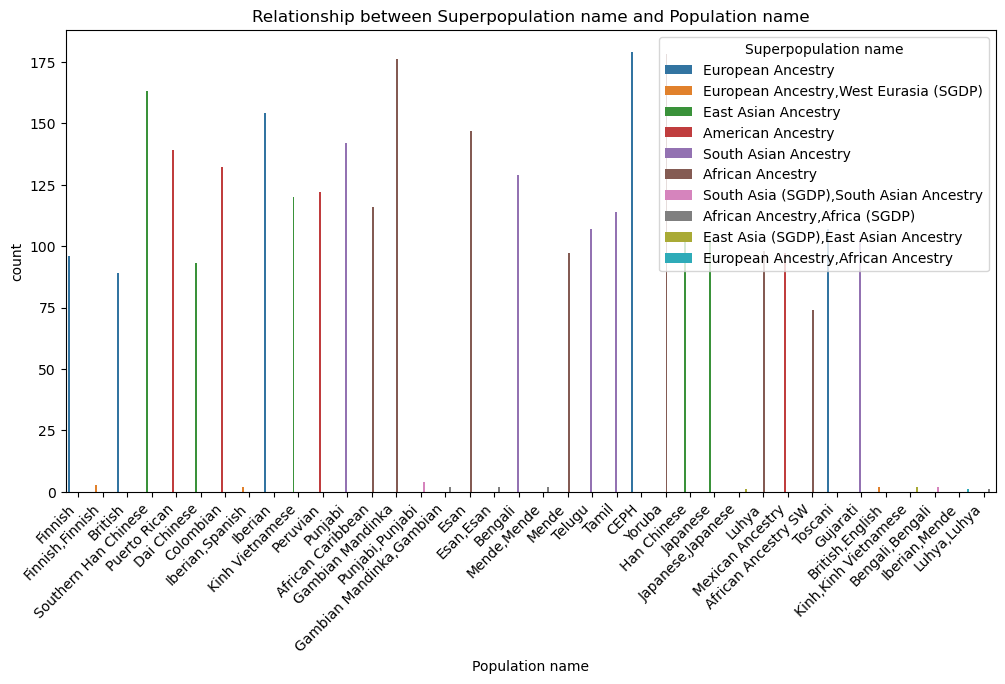

In [12]:
# Relationship between Superpopulation name and Population name
plt.figure(figsize=(12, 6))
sns.countplot(x='Population name', hue='Superpopulation name', data=df)
plt.title('Relationship between Superpopulation name and Population name')
plt.xticks(rotation=45, ha='right')
plt.show()

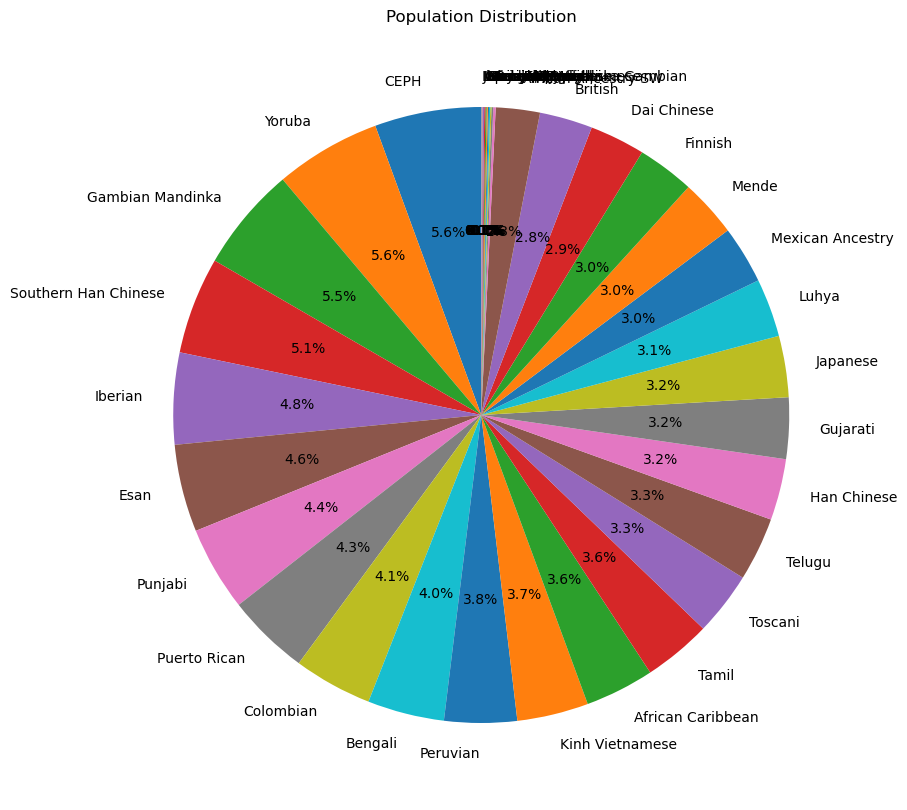

In [13]:
# Population distribution as a pie chart
plt.figure(figsize=(10, 10))
population_counts = df['Population name'].value_counts()
plt.pie(population_counts, labels=population_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Population Distribution')
plt.show()
# this figure still has some overlapping values so it's best to use data visualization tools such as power bi, tableau etc to get better visualization. 


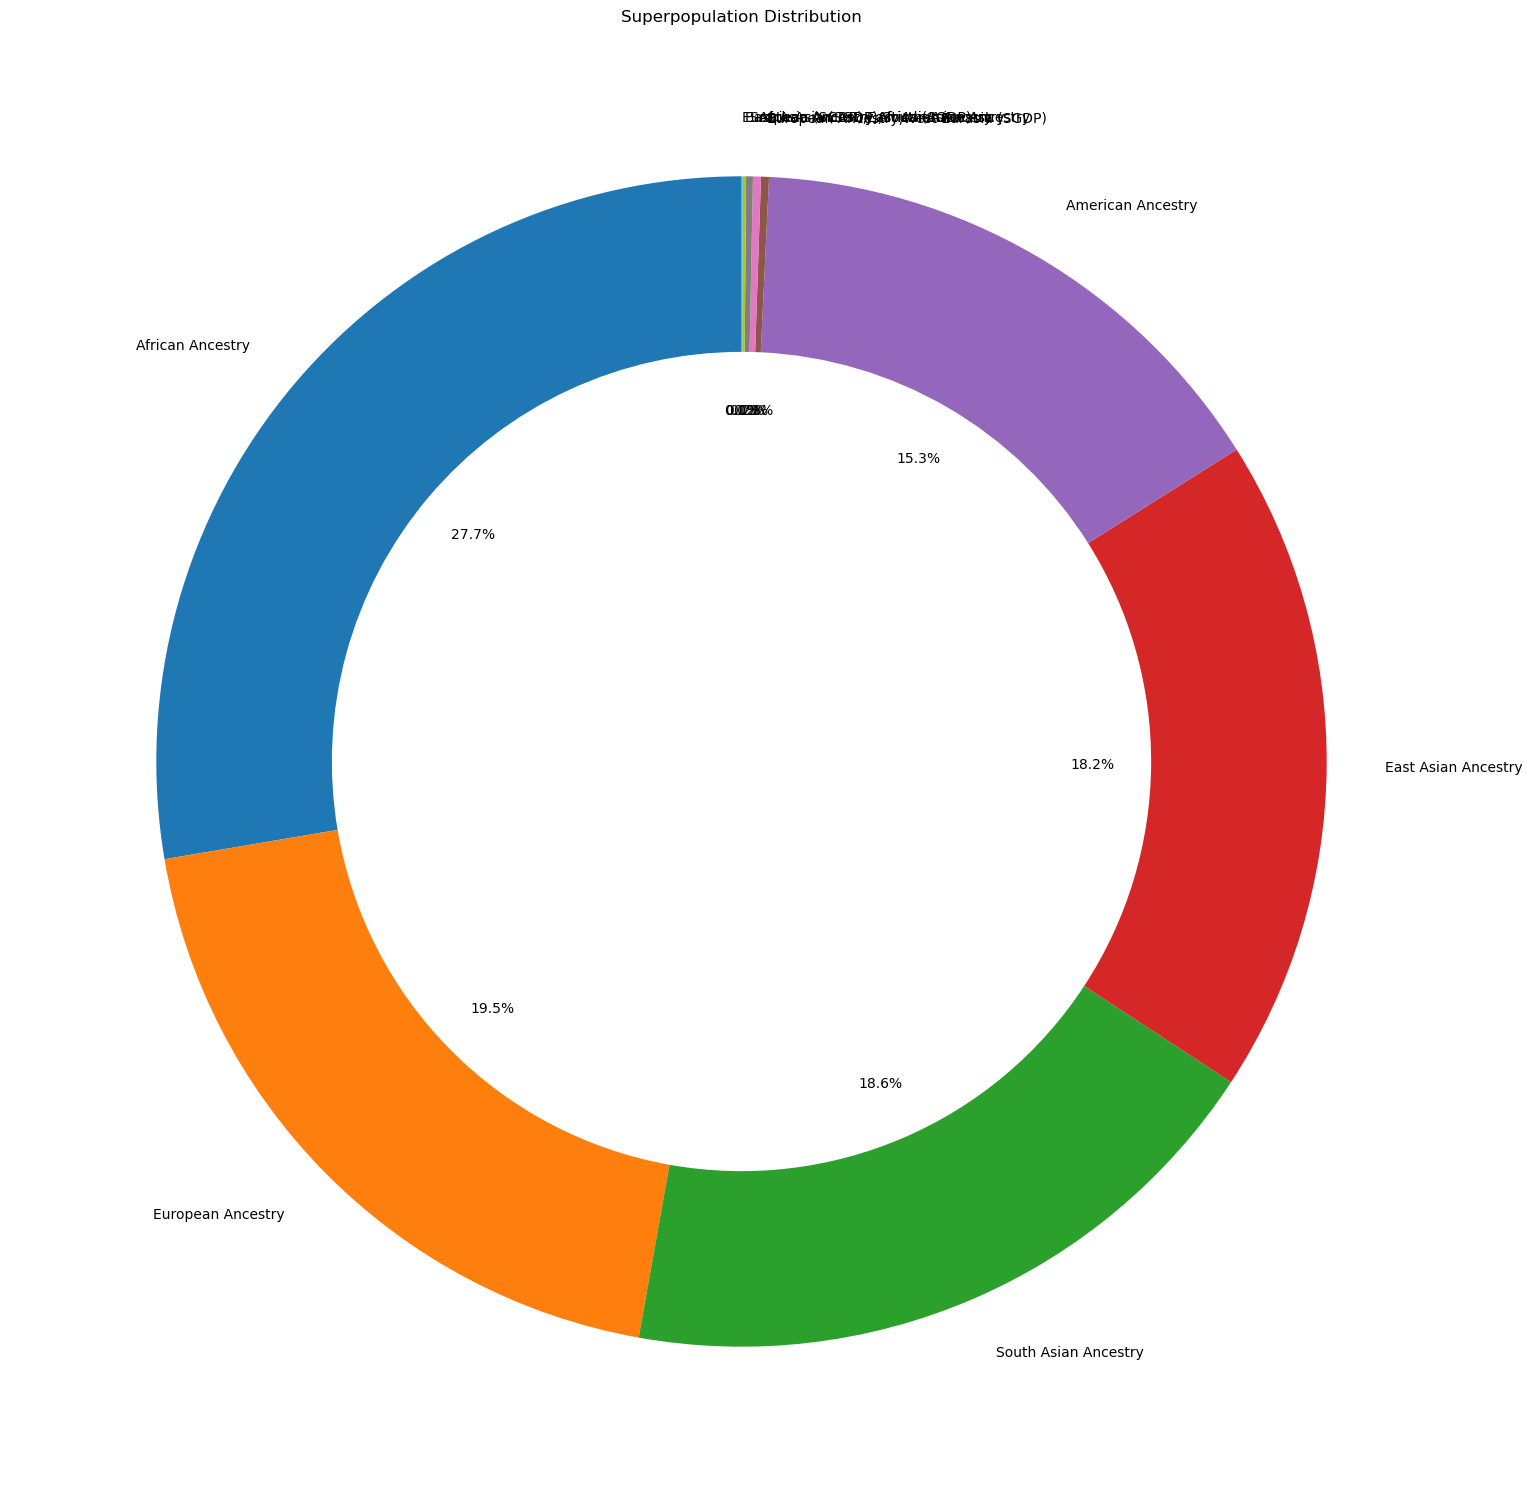

In [14]:
# Superpopulation distribution as a donut chart with larger size
plt.figure(figsize=(24, 19))
superpopulation_counts = df['Superpopulation name'].value_counts()
plt.pie(superpopulation_counts, labels=superpopulation_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Superpopulation Distribution')
plt.show()
# this figure still has some overlapping values so it's best to use data visualization tools such as power bi, tableau etc to get better visualization. 


In [16]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


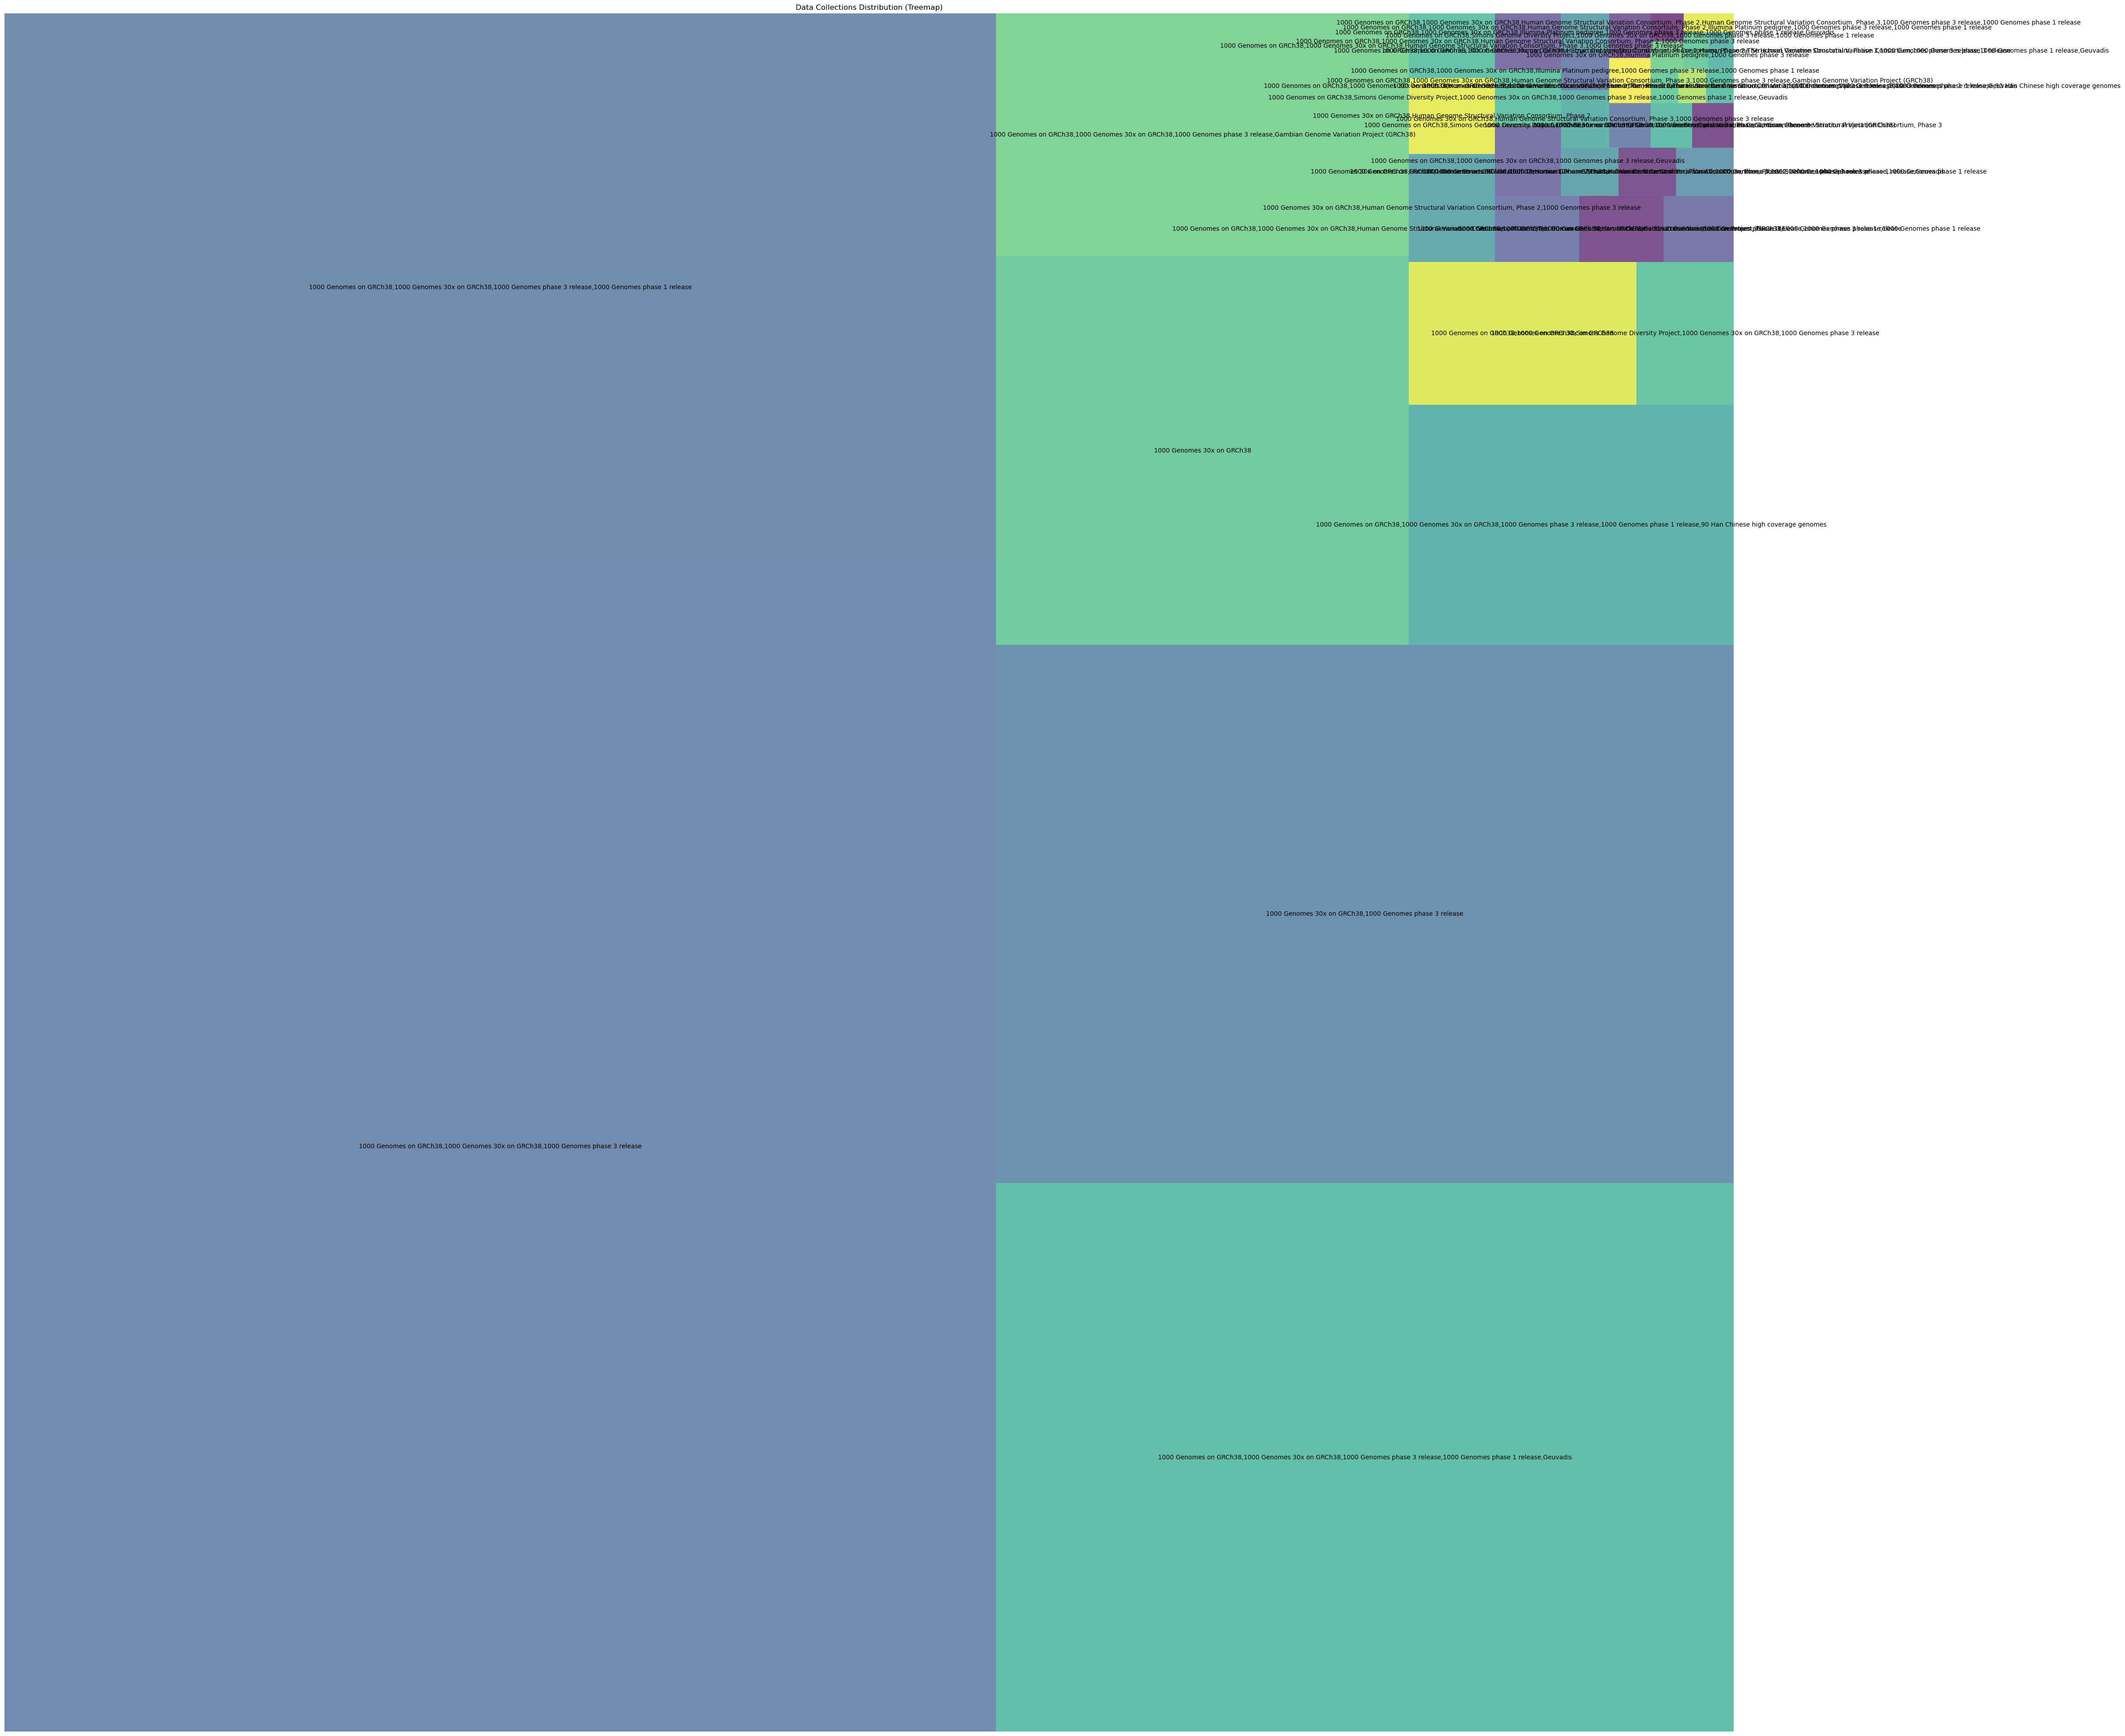

In [17]:
# Data collections distribution as a treemap with larger size
import squarify
plt.figure(figsize=(50, 50))  # used (170, 200) also but the overlapping still persists. 
data_collections_counts = df['Data collections'].value_counts()
squarify.plot(sizes=data_collections_counts, label=data_collections_counts.index, alpha=0.7)
plt.title('Data Collections Distribution (Treemap)')
plt.axis('off')
plt.show()

# this figure still has some overlapping values so it's best to use data visualization tools such as power bi, tableau etc to get better visualization. 


In [18]:
# Categorical heatmap showing the relationship between Population and Superpopulation with larger size
plt.figure(figsize=(18, 10))
heatmap_data = pd.crosstab(df['Population name'], df['Superpopulation name'])
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('Categorical Heatmap: Population vs. Superpopulation')
plt.show()


C:\Users\irosh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 96.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\irosh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\irosh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 98.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\irosh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\irosh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 96.8% of the points

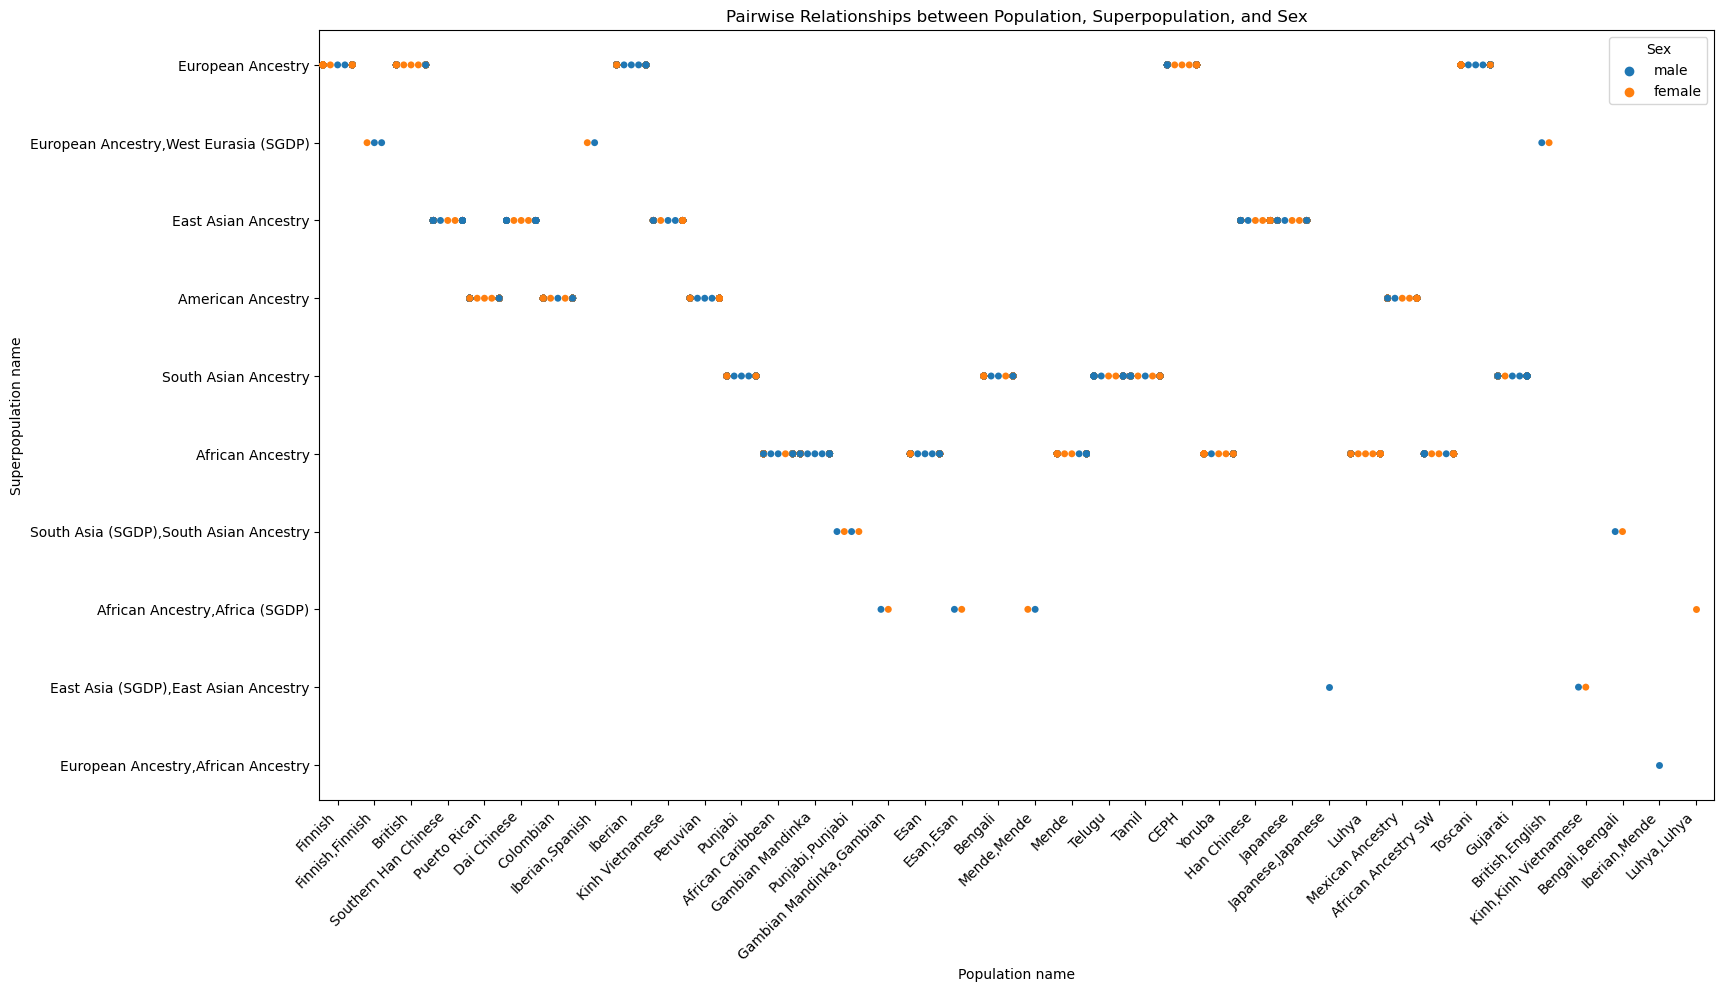

In [19]:
# Pairwise relationships with Swarm Plot with larger size
plt.figure(figsize=(18, 10))
sns.swarmplot(x='Population name', y='Superpopulation name', hue='Sex', data=df)
plt.title('Pairwise Relationships between Population, Superpopulation, and Sex')
plt.xticks(rotation=45, ha='right')
plt.show()


In [20]:

# Cross-tabulation between Population code and Superpopulation code
cross_tab = pd.crosstab(df['Population code'], df['Superpopulation code'])
print("\nCross-Tabulation between Population Code and Superpopulation Code:")
print(cross_tab)


Cross-Tabulation between Population Code and Superpopulation Code:
Superpopulation code  AFR  AMR  EAS  EUR  EUR,AFR  SAS
Population code                                       
ACB                   116    0    0    0        0    0
ASW                    74    0    0    0        0    0
BEB                     0    0    0    0        0  131
CDX                     0    0   93    0        0    0
CEU                     0    0    0  179        0    0
CHB                     0    0  103    0        0    0
CHS                     0    0  163    0        0    0
CLM                     0  132    0    0        0    0
ESN                   149    0    0    0        0    0
FIN                     0    0    0   99        0    0
GBR                     0    0    0   91        0    0
GIH                     0    0    0    0        0  103
GWD                   178    0    0    0        0    0
IBS                     0    0    0  156        0    0
IBS,MSL                 0    0    0    0        1   

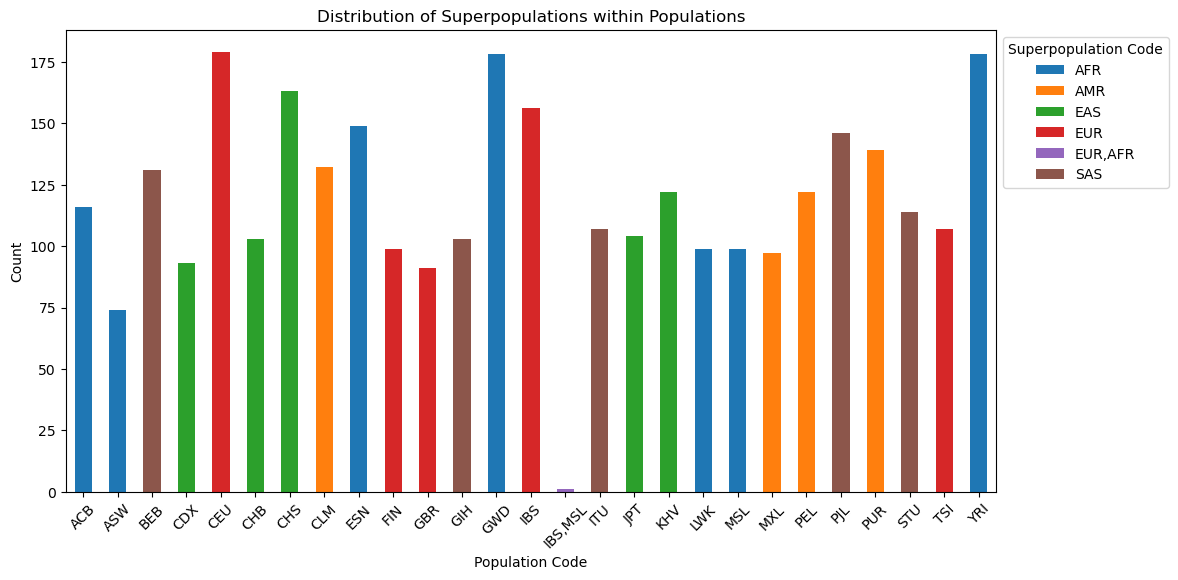

In [21]:

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Superpopulations within Populations')
plt.xlabel('Population Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Superpopulation Code', bbox_to_anchor=(1, 1))
plt.show()

In [22]:

# Create a cross-tabulation
cross_tab = pd.crosstab(df['Population code'], df['Superpopulation code'])


In [23]:
# Create a cross-tabulation
cross_tab_data_collections = pd.crosstab([df['Population code'], df['Superpopulation code']], df['Data collections'])


In [24]:

# Display the cross-tabulation
print("\nCross-Tabulation between Population Code, Superpopulation Code, and Data Collections:")
print(cross_tab_data_collections)



Cross-Tabulation between Population Code, Superpopulation Code, and Data Collections:
Data collections                      1000 Genomes 30x on GRCh38  \
Population code Superpopulation code                               
ACB             AFR                                            0   
ASW             AFR                                            0   
BEB             SAS                                           29   
CDX             EAS                                            0   
CEU             EUR                                            1   
CHB             EAS                                            0   
CHS             EAS                                            0   
CLM             AMR                                            1   
ESN             AFR                                           41   
FIN             EUR                                            0   
GBR             EUR                                            0   
GIH             SAS          

In [25]:
# Visualize the cross-tabulation using a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab_data_collections, cmap='viridis', annot=True, fmt='d')
plt.title('Cross-Tabulation: Population Code, Superpopulation Code, and Data collections')
plt.xlabel('Data collections')
plt.ylabel('Population and Superpopulation Codes')
plt.show()

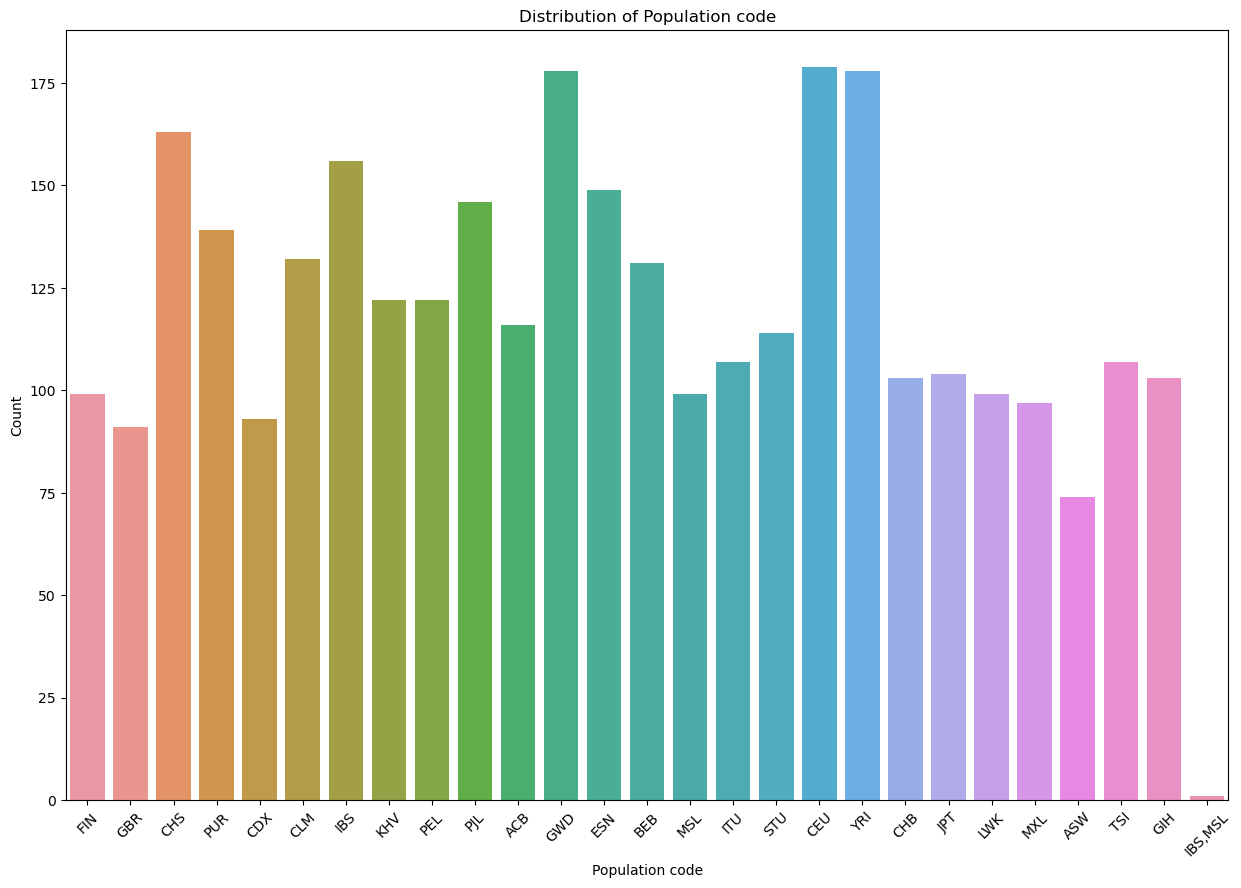

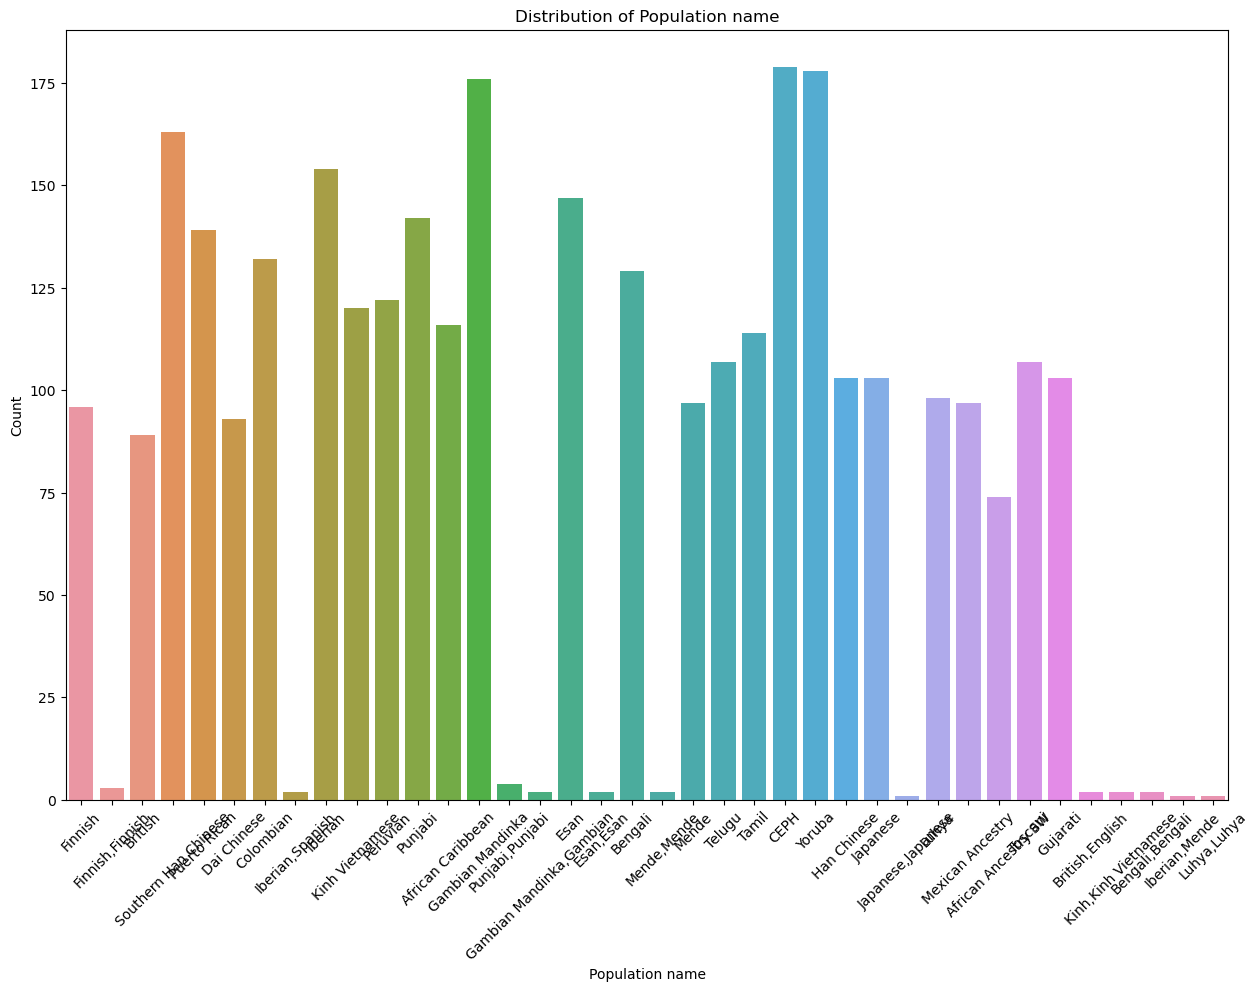

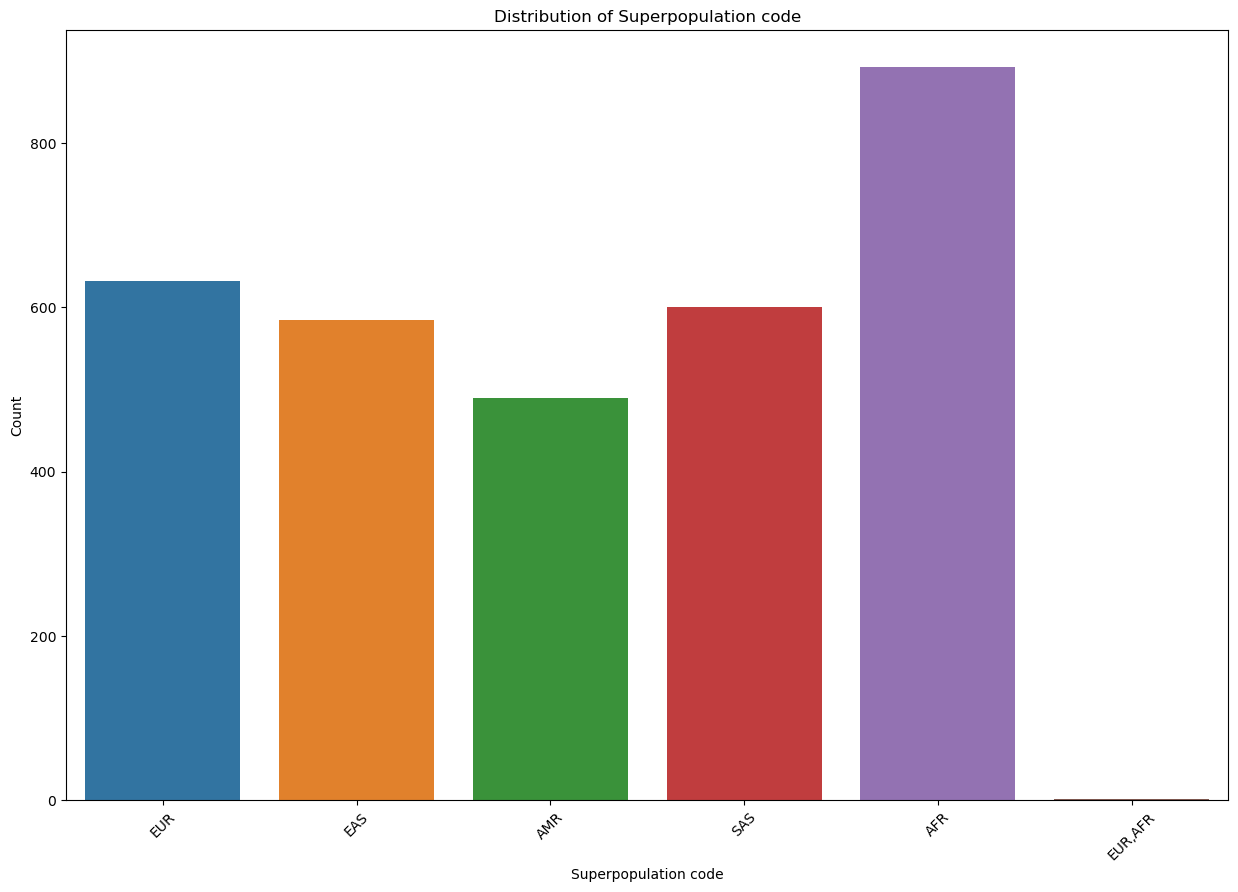

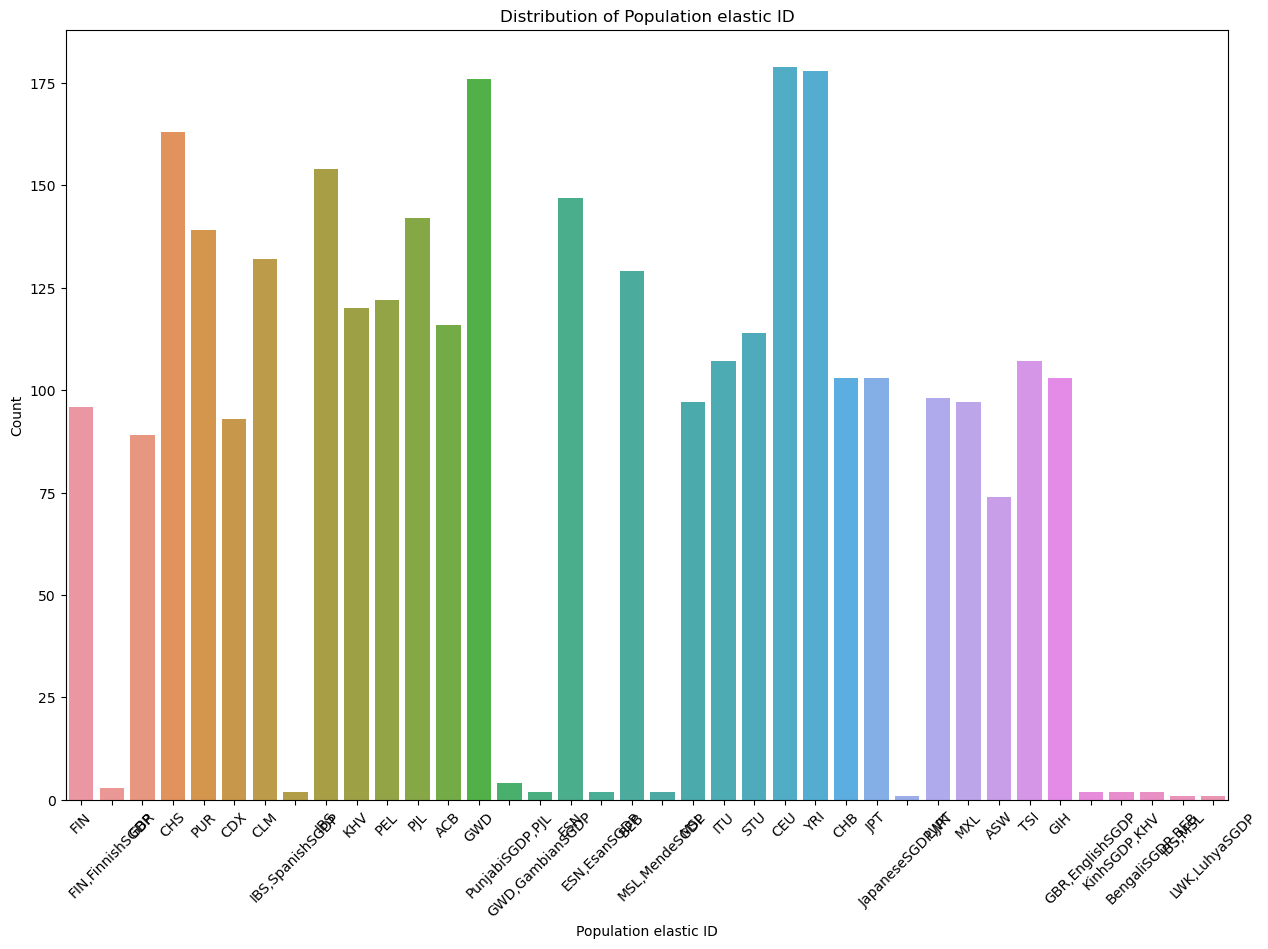

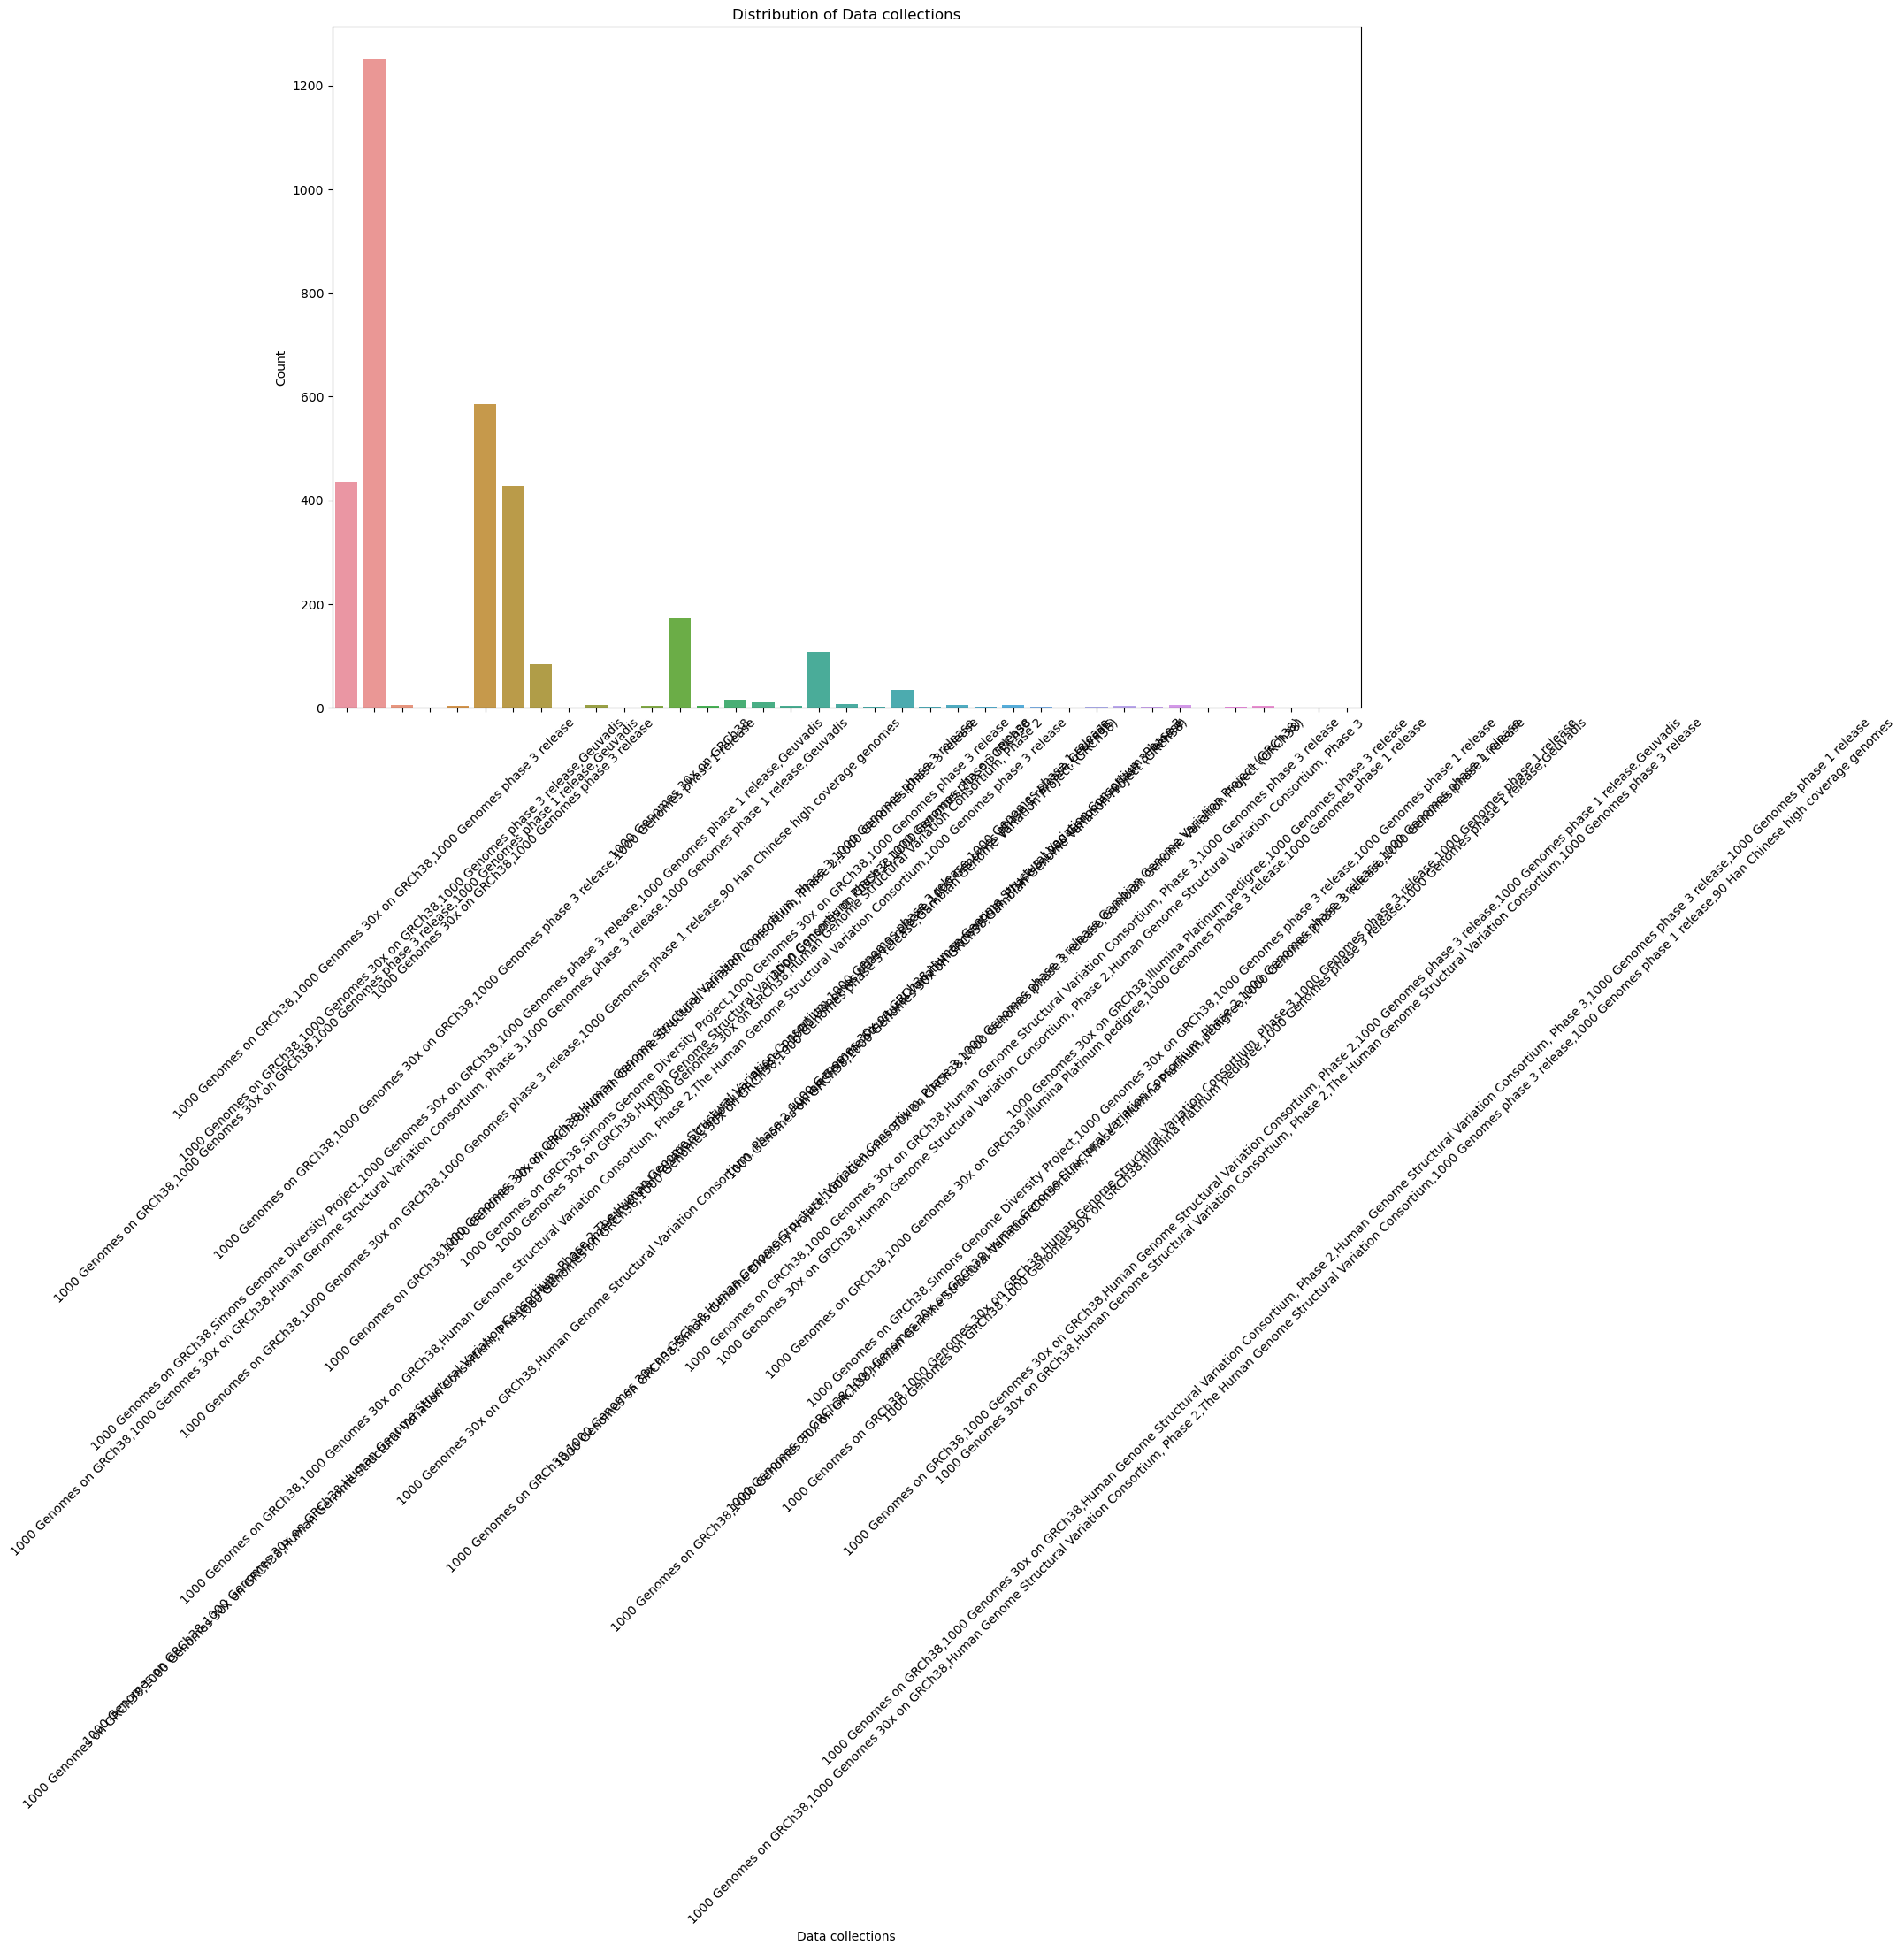

In [26]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(15, 10))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

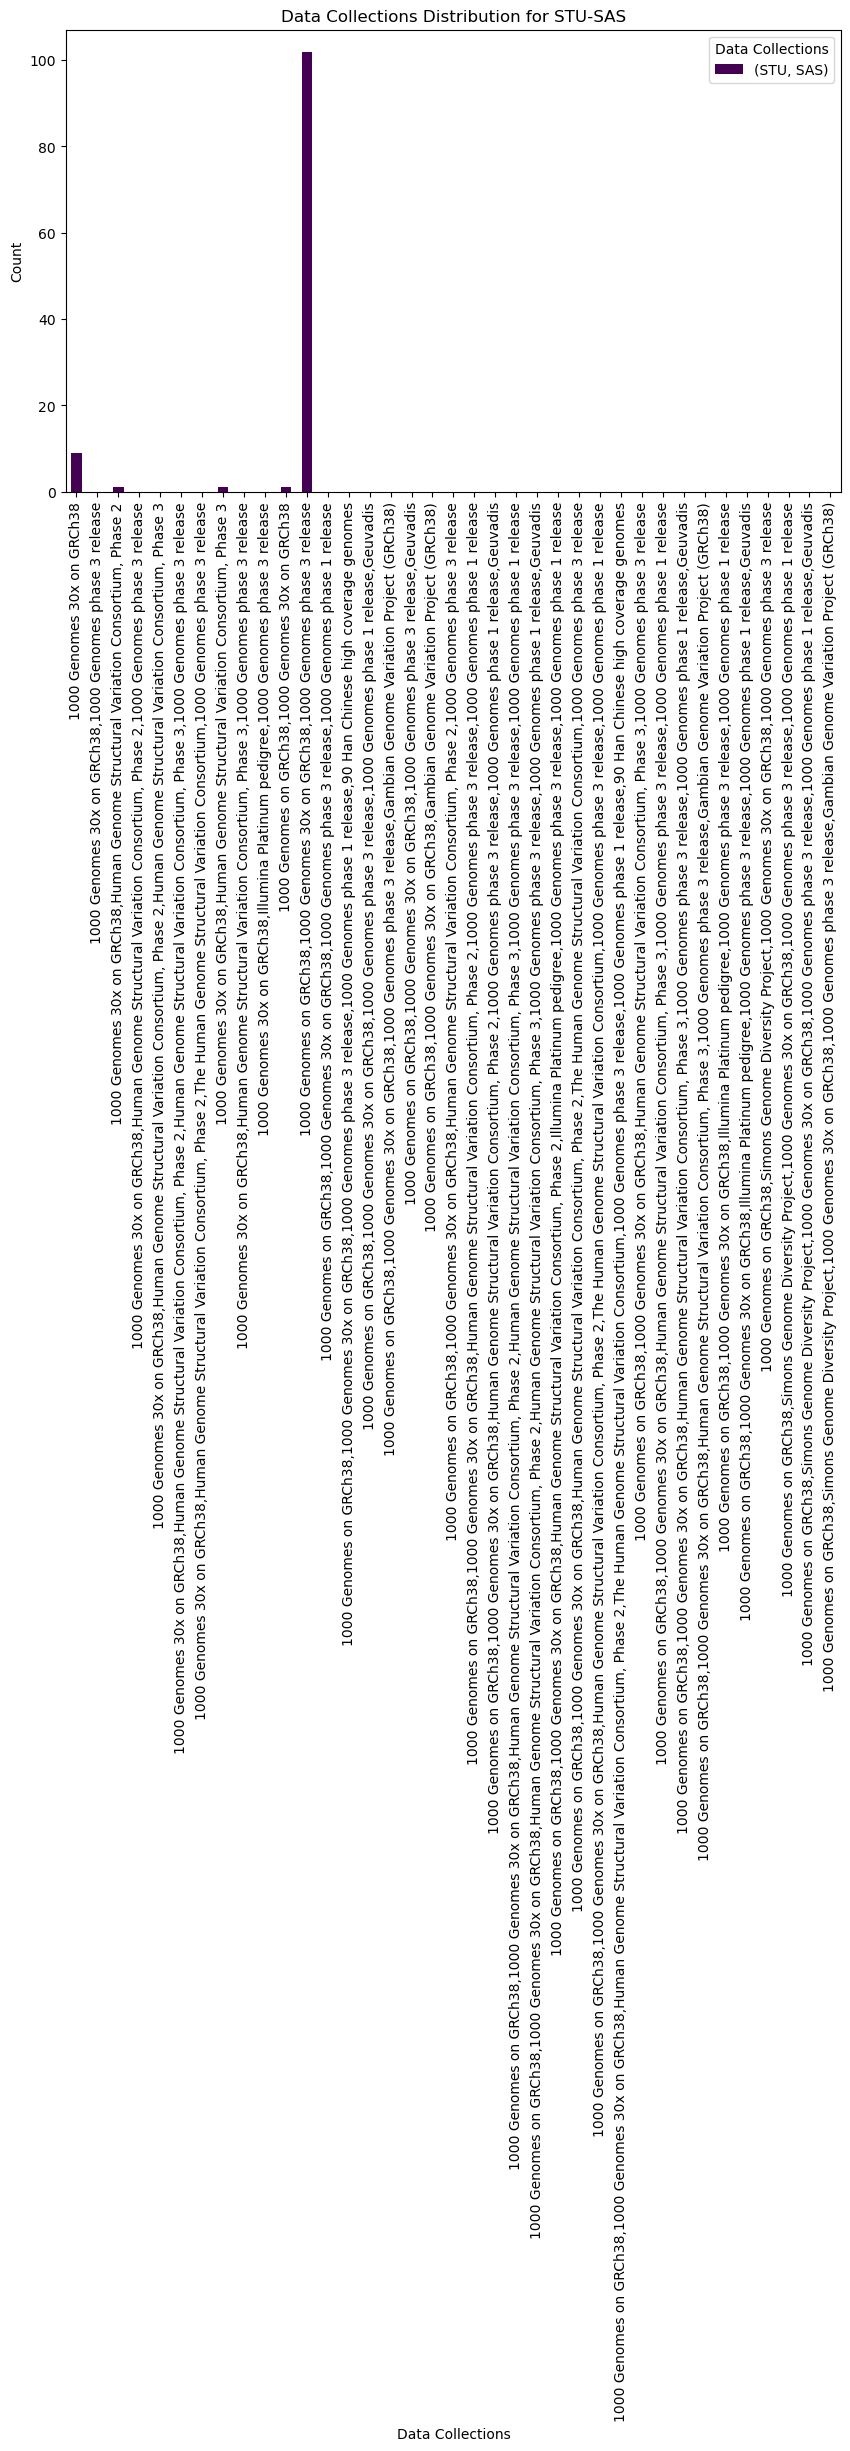

In [27]:
# Specify the population and superpopulation codes of interest
pop_code_of_interest = 'STU'
superpop_code_of_interest = 'SAS'

# Filter the cross-tabulation for the specified combination
data_collections_of_interest = cross_tab_data_collections.loc[(pop_code_of_interest, superpop_code_of_interest), :]

# Plot a bar chart for the selected combination
plt.figure(figsize=(10, 6))
data_collections_of_interest.T.plot(kind='bar', stacked=True, cmap='viridis')
plt.title(f'Data Collections Distribution for {pop_code_of_interest}-{superpop_code_of_interest}')
plt.xlabel('Data Collections')
plt.ylabel('Count')
plt.legend(title='Data Collections', bbox_to_anchor=(1, 1))
plt.show()


<Figure size 1400x1400 with 0 Axes>

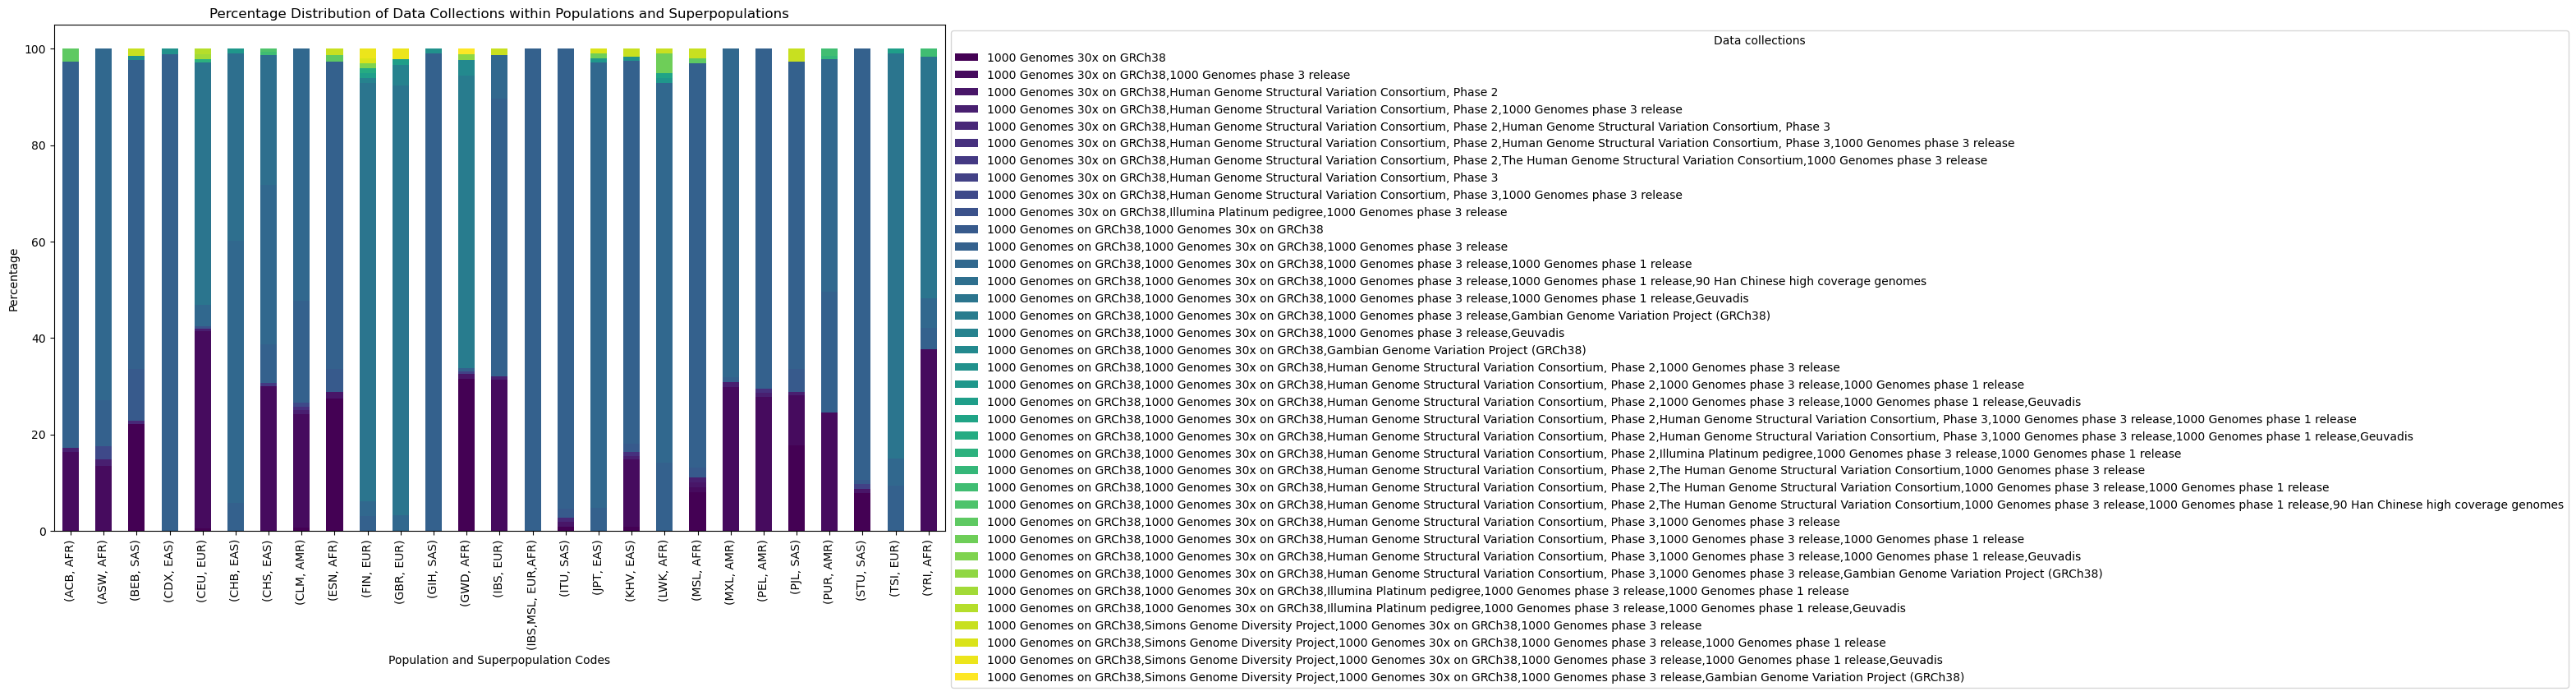

In [28]:
# Calculate percentage distribution of Data Collections within each Population
percentage_distribution = cross_tab_data_collections.div(cross_tab_data_collections.sum(axis=1), axis=0) * 100

# Visualize the percentage distribution using a stacked bar chart
plt.figure(figsize=(14, 14))
percentage_distribution.plot(kind='bar', stacked=True, cmap='viridis', figsize=(14, 8))
plt.title('Percentage Distribution of Data Collections within Populations and Superpopulations')
plt.xlabel('Population and Superpopulation Codes')
plt.ylabel('Percentage')
plt.legend(title='Data collections', bbox_to_anchor=(1, 1))
plt.show()


# Exploratory Data Analysis (EDA) Findings Report

## Introduction

The dataset under analysis pertains to the "1000 Genomes 30x on GRCh38" project. The primary objective of this Exploratory Data Analysis (EDA) is to gain insights into the characteristics and distribution of the dataset.


### Observations 
There are 3202 unique Sample values and Biosample id’s.
 
The population distributions shows CEPH (European Ancestry) having high populations. The Lowest population was of Luhya (African Ancestry).

The data contains 50.1% of female records and 49.9% of male records.

The super population code distribution shows AFR as highest super population code and AMR having the lowest super population code in the data set. 

The Super population name distribution shows African Ancestry as the highest super population name and the European ancestry, African Ancestry as the lowest super population name.

The relationship between sex and population name distributions shows highest number of CEPH females and it also shows that Japanese and Iberian, Mende with zero female population distribution. 
For the male distribution, it shows Yoruba population name to have the highest number of male population distribution whereas Luhya to have zero male population distribution. 

Relationship between Superpopulation name and Population name distribution shows Gambian Mandinka population as highest African Ancestry.

The pie chart indicates that CEPH has the highest population which is 5.6% in the dataset


## Conclusion

The Exploratory Data Analysis (EDA) has provided valuable insights into the dataset's characteristics. The balanced gender distribution, diverse population codes, and the prevalence of specific superpopulations are notable findings. 

# Population and Superpopulation Analysis Report

## Introduction

This report provides an analysis of the relationship between "Population Code" and "Superpopulation Code" based on a cross-tabulation of the dataset.

## Cross-Tabulation Summary
The following table summarizes the counts for each combination of Population Code and Superpopulation Code:

| Population Code | AFR | AMR | EAS | EUR | EUR,AFR | SAS |
| --------------- | --- | --- | --- | --- | ------- | --- |
| ACB             | 116 | 0   | 0   | 0   | 0       | 0   |
| ASW             | 74  | 0   | 0   | 0   | 0       | 0   |
| BEB             | 0   | 0   | 0   | 0   | 0       | 131 |
| CDX             | 0   | 0   | 93  | 0   | 0       | 0   |
| CEU             | 0   | 0   | 0   | 179 | 0       | 0   |
| CHB             | 0   | 0   | 103 | 0   | 0       | 0   |
| CHS             | 0   | 0   | 163 | 0   | 0       | 0   |
| CLM             | 0   | 132 | 0   | 0   | 0       | 0   |
| ESN             | 149 | 0   | 0   | 0   | 0       | 0   |
| FIN             | 0   | 0   | 0   | 99  | 0       | 0   |
| GBR             | 0   | 0   | 0   | 91  | 0       | 0   |
| GIH             | 0   | 0   | 0   | 0   | 0       | 103 |
| GWD             | 178 | 0   | 0   | 0   | 0       | 0   |
| IBS             | 0   | 0   | 0   | 156 | 0       | 0   |
| IBS,MSL         | 0   | 0   | 0   | 0   | 1       | 0   |
| ITU             | 0   | 0   | 0   | 0   | 0       | 107 |
| JPT             | 0   | 0   | 104 | 0   | 0       | 0   |
| KHV             | 0   | 0   | 122 | 0   | 0       | 0   |
| LWK             | 99  | 0   | 0   | 0   | 0       | 0   |
| MSL             | 99  | 0   | 0   | 0   | 0       | 0   |
| MXL             | 0   | 97  | 0   | 0   | 0       | 0   |
| PEL             | 0   | 122 | 0   | 0   | 0       | 0   |
| PJL             | 0   | 0   | 0   | 0   | 0       | 146 |
| PUR             | 0   | 139 | 0   | 0   | 0       | 0   |
| STU             | 0   | 0   | 0   | 0   | 0       | 114 |
| TSI             | 0   | 0   | 0   | 107 | 0       | 0   |
| YRI             | 178 | 0   | 0   | 0   | 0       | 0   |

## Observations
1. **ACB:** African Caribbean in Barbados, belongs to the 'AFR' (African) superpopulation.
2. **ASW:** African Ancestry in Southwest USA, belongs to the 'AFR' (African) superpopulation.
3. **BEB:** Bengali from Bangladesh, belongs to the 'SAS' (South Asian) superpopulation.
4. **CDX:** Chinese Dai in Xishuangbanna, belongs to the 'EAS' (East Asian) superpopulation.
5. **CEU:** Utah Residents with Northern and Western European Ancestry, belongs to the 'EUR' (European) superpopulation.
6. **CHB:** Han Chinese in Beijing, belongs to the 'EAS' (East Asian) superpopulation.
7. **CHS:** Southern Han Chinese, belongs to the 'EAS' (East Asian) superpopulation.
8. **CLM:** Colombian in Medellin, belongs to the 'AMR' (Ad Mixed American) superpopulation.
9. **ESN:** Esan in Nigeria, belongs to the 'AFR' (African) superpopulation.
10. **FIN:** Finnish in Finland, belongs to the 'EUR' (European) superpopulation.
11. **GBR:** British in England and Scotland, belongs to the 'EUR' (European) superpopulation.
12. **GIH:** Gujarati Indian from Houston, belongs to the 'SAS' (South Asian) superpopulation.
13. **GWD:** Gambian in Western Division, belongs to the 'AFR' (African) superpopulation.
14. **IBS:** Iberian Population in Spain, belongs to the 'EUR' (European) superpopulation.
15. **IBS,MSL:** Iberian Population in Spain and Mende in Sierra Leone, belongs to the 'EUR' (European) and 'AFR' (African) superpopulations respectively.
16. **ITU:** Indian Telugu from the UK, belongs to the 'SAS' (South Asian) superpopulation.
17. **JPT:** Japanese in Tokyo, belongs to the 'EAS' (East Asian) superpopulation.
18. **KHV:** Kinh in Ho Chi Minh City, belongs to the 'EAS' (East Asian) superpopulation.
19. **LWK:** Luhya in Webuye, Kenya, belongs to the 'AFR' (African) superpopulation.
20. **MSL:** Mende in Sierra Leone, belongs to the 'AFR' (African) superpopulation.
21. **MXL:** Mexican Ancestry from Los Angeles USA, belongs to the 'AMR' (Ad Mixed American) superpopulation.
22. **PEL:** Peruvian in Lima, belongs to the 'AMR' (Ad Mixed American) superpopulation.
23. **PJL:** Punjabi from Lahore, belongs to the 'SAS' (South Asian) superpopulation.
24. **PUR:** Puerto Rican in Puerto Rico, belongs to the 'AMR' (Ad Mixed American) superpopulation.
25. **STU:** Sri Lankan Tamil from the UK, belongs to the 'SAS' (South Asian) superpopulation.
26. **TSI:** Tuscan in Italy, belongs to the 'EUR' (European) superpopulation.
27. **YRI:** Yoruba in Nigeria, belongs to the 'AFR' (African) superpopulation.

## Conclusion
The cross-tabulation provides insights into the distribution of populations within each superpopulation and helps understand the diversity in the dataset.



## Chi-Squared Test of Independence in Data Analysis

The chi-squared test of independence is a statistical test used to determine if there is a significant association between two categorical variables. In the context of your data analysis, the chi-squared test was likely applied to investigate the relationship between the "Population Code" and "Superpopulation Code" columns.

### Key Reasons for Using the Chi-Squared Test:

1. **Categorical Variables:**
   - The "Population Code" and "Superpopulation Code" columns contain categorical data, where each entry falls into distinct categories or groups.

2. **Independence Test:**
   - The chi-squared test assesses whether there is a statistically significant association (independence) between two categorical variables. In your case, it helps determine if the distribution of population codes is independent of superpopulation codes or if there is a dependency.

3. **Cross-Tabulation:**
   - The test is often applied in the context of cross-tabulation, where a contingency table is created to show the frequency distribution of the two categorical variables. This table helps visualize and analyze the relationships between variables.

4. **Expected vs. Observed Frequencies:**
   - The test compares the observed frequencies in the contingency table with the frequencies that would be expected under the assumption of independence. If the observed and expected frequencies significantly differ, it suggests that there is a relationship between the variables.

In summary, the chi-squared test is a valuable tool for exploring associations between categorical variables and determining whether those associations are statistically significant. It helps in understanding the structure and dependencies within the dataset.
set.









In [29]:
from scipy import stats

# Chi-squared test of independence (assuming 'Population code' and 'Superpopulation code' are relevant)
chi2, p, _, _ = stats.chi2_contingency(cross_tab)
print("\nChi-squared Test of Independence:")
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")


Chi-squared Test of Independence:
Chi-squared: 16010.000000000002
P-value: 0.0
